# Development of the Kpn cgMLST scheme

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Bio import SeqIO

In [9]:
# Change the current working directory
os.chdir('/path/to/your/dir/')
print("Current working directory:", os.getcwd())

In [11]:
# Load the Excel file with all Kp1 isolates that have whole genome sequence data in BIGSdb
data=pd.read_excel('./BIGSDB_datasets/all/All_KP1_assebly_check_passed.xlsx')   
print(data.shape)
print(data.head(1))

(37874, 37)
   id isolate       aliases  sender  curator date_entered   datestamp  \
0   6  02A029  02A029; SB14       2      504   2006-09-05  2022-11-03   

  taxonomic_designation phylogroup_from_ST QC_status  ...  \
0         K. pneumoniae       Kp1 (7 loci)         0  ...   

   scgST (scgMLST629_S)  LINcode (scgMLST629_S) Phylogroup (scgMLST629_S)  \
0                  9677  0_0_429_0_42_0_1_0_0_0                       Kp1   

  Sublineage (scgMLST629_S) Clonal group (scgMLST629_S) ST (MLST)  \
0                      SL23                        CG23        23   

  rST (Ribosomal MLST) genus (Ribosomal MLST) species (Ribosomal MLST)  \
0                19197             Klebsiella    Klebsiella pneumoniae   

  subspecies (Ribosomal MLST)  
0                         NaN  

[1 rows x 37 columns]


In [9]:
# Keep only scgMLST629_S kp1 isolates. Sanity check, we expect all to be kp1
# convert all entries in the column to string
data['LINcode (scgMLST629_S)'] = data['LINcode (scgMLST629_S)'].astype(str)
df_kp1=data.copy()
df_phylo_kp1=data.copy()

# Lin codes startng with 0_0 will be kept. Those are kp1 isolates
df_kp1 = df_kp1[df_kp1['LINcode (scgMLST629_S)'].str.startswith('0_0')]
# OR
# column 'Phylogroup (scgMLST629_S)' is 'Kp1'
df_phylo_kp1 = df_phylo_kp1[df_phylo_kp1['Phylogroup (scgMLST629_S)'] == 'Kp1']
print(df_kp1.shape)
print(df_phylo_kp1.shape)

(37874, 37)
(37874, 37)


In [10]:
# Remove all isolates that are Rhinoscleromatis or Ozaenae. Those belong to the LIN codes 0_0_442, 0_0_443 and 0_0_439
df_RO = df_kp1[
    df_kp1['LINcode (scgMLST629_S)'].str.startswith('0_0_442') |
    df_kp1['LINcode (scgMLST629_S)'].str.startswith('0_0_443') |
    df_kp1['LINcode (scgMLST629_S)'].str.startswith('0_0_439')
]

filtered_df = df_kp1[
    ~(
        df_kp1['LINcode (scgMLST629_S)'].str.startswith('0_0_442') |
        df_kp1['LINcode (scgMLST629_S)'].str.startswith('0_0_443') |
        df_kp1['LINcode (scgMLST629_S)'].str.startswith('0_0_439')
    )
]

isolates_remove=list(df_RO['isolate'])
print('The number of isolates belonging to the Ozaenae or Rhinoscleromatis (LIN codes 0_0_442, 0_0_443 and 0_0_439) are: ', len(isolates_remove), '\n')
print("Those isolates are: ")
print(isolates_remove)
ids_remove=list(df_RO['id'])
print(ids_remove)

The number of isolates belonging to the Ozaenae or Rhinoscleromatis (LIN codes 0_0_442, 0_0_443 and 0_0_439) are:  19 

Those isolates are: 
['CIP 52.210 T', 'CIP 52.211 T', 'SRR11816163', 'GCA_003660205.1', 'GCA_900451535.1', 'GCA_900451475.1', 'GCA_900451645.1', 'GCA_900451425.1', 'GCA_900451495.1', 'GCA_900451725.1', 'GCA_900451855.1', 'GCA_900451765.1', 'GCA_900451795.1', 'GCA_900451705.1', 'GCA_900451685.1', 'GCA_900451825.1', 'GCA_900451895.1', 'GCA_000826585.2', 'GCA_001598715.1']
[333, 346, 30347, 50155, 51092, 51093, 51094, 51095, 51102, 51106, 51108, 51109, 51112, 51113, 51114, 51126, 51127, 51447, 51448]


In [11]:
#number of unique LIN values
unique_LINs = filtered_df['LINcode (scgMLST629_S)'].unique()
print(len(unique_LINs))

24696


# Processing quast results


In [13]:
# save all the quast results in a list of dataframe named quast_results_dfs
# dir of all quast results
base_dir = './BIGSDB_datasets/all/contigs/fasta/quast/'
#names of the isolates
fasta_names_file = './BIGSDB_datasets/all/contigs/fasta_names.txt'

# Initialize an empty list to store DataFrames
quast_results_dfs = []

# Read the file that contains folder names
with open(fasta_names_file, 'r') as f:
    folder_names = f.read().splitlines()

# Iterate through each folder name
for folder in folder_names:
    # Construct the path to the transposed_report.tsv file
    tsv_file_path = os.path.join(base_dir, folder, 'transposed_report.tsv')   
    # Check if the file exists before attempting to load it
    if os.path.exists(tsv_file_path):
        try:
            # Read the TSV file into a DataFrame
            df = pd.read_csv(tsv_file_path, delimiter='\t')
            # Append the DataFrame to the list
            quast_results_dfs.append(df)
        except Exception as e:
            print(f"Error loading {tsv_file_path}: {e}")
    else:
        print(f"File {tsv_file_path} does not exist")

File ./BIGSDB_datasets/all/contigs/fasta/quast/73882_NRZ_81308.fas/transposed_report.tsv does not exist
File ./BIGSDB_datasets/all/contigs/fasta/quast/22264_YEHE6.fas/transposed_report.tsv does not exist
File ./BIGSDB_datasets/all/contigs/fasta/quast/22265_YEHE8.fas/transposed_report.tsv does not exist
File ./BIGSDB_datasets/all/contigs/fasta/quast/22266_YEHE15.fas/transposed_report.tsv does not exist


In [14]:
#For 4 isolates (73882_NRZ_81308.fas, 22264_YEHE6.fas, 22265_YEHE8.fas, 22266_YEHE15.fas) QUAST couldn't make the analysis

In [15]:
# Initialize lists to store the extracted values from quast
Total_lengths = []
GCs = []
N50s = []
L50s = []
Ns_per_100_kbp = []
contigs=[]

# Iterate through each DataFrame in the list
for df in quast_results_dfs:
    # Extract values from each required column and append to corresponding list
    Total_lengths.append(df['Total length'].iloc[0])      
    GCs.append(df['GC (%)'].iloc[0])                      
    N50s.append(df['N50'].iloc[0])                         
    L50s.append(df['L50'].iloc[0])                         
    Ns_per_100_kbp.append(df["# N's per 100 kbp"].iloc[0])
    contigs.append(df['# contigs'].iloc[0])
    
#Calculate the means
TotalLength_mean = np.mean(Total_lengths)
print("The mean of the total lengths of the assemblies is: ", TotalLength_mean)
GCs_mean = np.mean(GCs)
print("The mean of the GC % of the assemblies is: ", GCs_mean)
N50s_mean = np.mean(N50s)
print("The mean of the N50s of the assemblies is: ", N50s_mean)
L50s_mean = np.mean(L50s)
print("The mean of the L50s of the assemblies is: ", L50s_mean)
Ns_per_100_kbp_mean = np.mean(Ns_per_100_kbp)
print("The mean of the Ns_per_100_kbp of the assemblies is: ", Ns_per_100_kbp_mean)
contigs_mean=np.mean(contigs)
print("The mean of the number of contigs is: ", contigs_mean)

# Calculate the standard deviations
TotalLength_std_dev = np.std(Total_lengths)
print("The standard deviation of the total length of the assemblies is: ", TotalLength_std_dev)
GC_std_dev = np.std(GCs)
print("The standard deviation of the GC % of the assemblies is: ", GC_std_dev)
N50_std_dev = np.std(N50s)
print("The standard deviation of the N50 of the assemblies is: ", N50_std_dev)
L50_std_dev = np.std(L50s)
print("The standard deviation of the L50 of the assemblies is: ", L50_std_dev)
Ns_per_100_kbp_std_dev = np.std(Ns_per_100_kbp)
print("The standard deviation of the Ns_per_100_kbp of the assemblies is: ", Ns_per_100_kbp_std_dev)  
contigs_std_dev=np.std(contigs)
print("The standard deviation of the number of contigs is: ", contigs_std_dev)


The mean of the total lengths of the assemblies is:  5565664.453713794
The mean of the GC % of the assemblies is:  57.15242586750789
The mean of the N50s of the assemblies is:  427074.880126183
The mean of the L50s of the assemblies is:  9.362632635503298
The mean of the Ns_per_100_kbp of the assemblies is:  37.76128936048178
The mean of the number of contigs is:  89.48815600802982
The standard deviation of the total length of the assemblies is:  184244.43920431897
The standard deviation of the GC % of the assemblies is:  0.23990983249499137
The standard deviation of the N50 of the assemblies is:  882240.3600411895
The standard deviation of the L50 of the assemblies is:  6.615832766801248
The standard deviation of the Ns_per_100_kbp of the assemblies is:  448.91526333437275
The standard deviation of the number of contigs is:  54.723698030542295


In [26]:
## Check if the isolates fulfill QC criteria. The criteria:
# mean 2*+/-std dev for total length and GC%
# N50 >= 60.000
# L50 <=30 
# Ns_per_100_kbp <= 30

# Initialize list to store names of isolates with QC failures
QCfailed_isolates = [] 

# Iterate through each df in the list
for df in quast_results_dfs:
    try:
        # Extract necessary columns
        total_length = df['Total length'].iloc[0]
        gc_percentage = df['GC (%)'].iloc[0]
        n50 = df['N50'].iloc[0]
        l50 = df['L50'].iloc[0]
        ns_per_100_kbp = df["# N's per 100 kbp"].iloc[0]
        isolate_name = df['Assembly'].iloc[0]  # Extract the isolate name once
        contig=df['# contigs'].iloc[0]
        
        # Check if values are within the specified range        
        if not (TotalLength_mean - 2*TotalLength_std_dev <= total_length <= TotalLength_mean + 2*TotalLength_std_dev ):
            # Add to the list if not already present
            if isolate_name not in QCfailed_isolates:
                QCfailed_isolates.append(isolate_name)
        
        if not (GCs_mean - 2*GC_std_dev <= gc_percentage <= GCs_mean + 2*GC_std_dev):
            # Add to the list if not already present
            if isolate_name not in QCfailed_isolates:
                QCfailed_isolates.append(isolate_name) 
            
        if not (n50 >= 60000):
            # Add to the list if not already present
            if isolate_name not in QCfailed_isolates:
                QCfailed_isolates.append(isolate_name)
                
        if not (l50 <= 30):
            # Add to the list if not already present
            if isolate_name not in QCfailed_isolates:
                QCfailed_isolates.append(isolate_name)
                
        if not (ns_per_100_kbp <= 30):
            # Add to the list if not already present
            if isolate_name not in QCfailed_isolates:
                QCfailed_isolates.append(isolate_name) 
        
        if not (contig <= contigs_mean + 2*contigs_std_dev):
            # Add to the list if not already present
            if isolate_name not in QCfailed_isolates:
                QCfailed_isolates.append(isolate_name)
    
    except KeyError as e:
        print(f"Column not found in DataFrame: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Print or use the QCfailed_isolates list as needed
print("There are", len(QCfailed_isolates), "isolates that do not meet the assembly QC criteria")
# print(QCfailed_isolates)

# len(set(QCfailed_isolates))

# # Save QCfailed_isolates to a file named 'qc_failed_isolates.txt'
# with open('qc_failed_isolates.txt', 'w') as f:
#     for isolate in QCfailed_isolates:
#         f.write(isolate + '\n')


There are 5623 isolates that do not meet the assembly QC criteria


# Figures with QC cut-offs

797


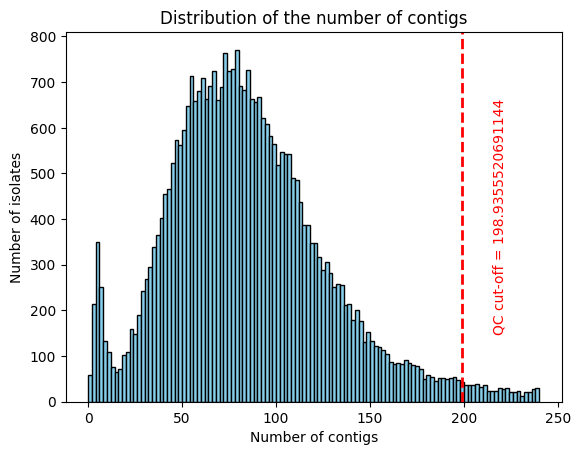

In [17]:
print(max(contigs))
cutoff=contigs_mean + 2*contigs_std_dev

# distribution of Ns per 100 kbp
plt.hist(contigs, bins=120, range=(0, 240), color='skyblue', edgecolor='black')
plt.title('Distribution of the number of contigs')
plt.xlabel('Number of contigs')
plt.ylabel('Number of isolates')


plt.axvline(x=cutoff, color='red', linestyle='--', linewidth=2)
plt.text(cutoff + 1/10 * cutoff, plt.ylim()[1] * 0.5, f'QC cut-off = {cutoff}', color='red', ha='center', 
         va='center', rotation=90, rotation_mode='anchor', fontsize=10)

! mkdir -p plots
#plt.savefig('plots/histogram_contigs.png', dpi=300)  # 'dpi' sets the resolution
plt.show()


15206.16


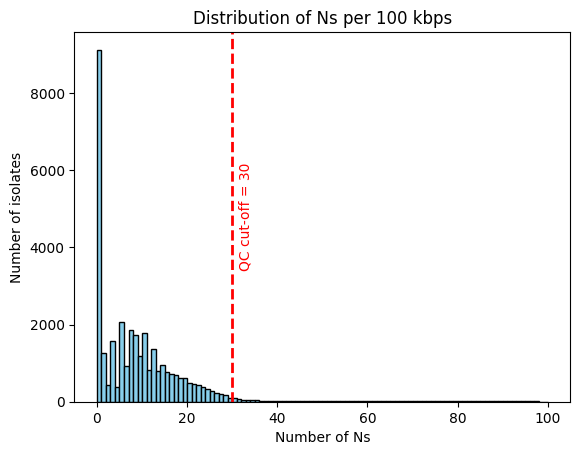

In [18]:
print(max(Ns_per_100_kbp))
cutoff=30

# distribution of Ns per 100 kbp
plt.hist(Ns_per_100_kbp, bins=100, range=(0, 100), color='skyblue', edgecolor='black')
plt.title('Distribution of Ns per 100 kbps')
plt.xlabel('Number of Ns')
plt.ylabel('Number of isolates')


plt.axvline(x=cutoff, color='red', linestyle='--', linewidth=2)
plt.text(cutoff + 1/10 * cutoff, plt.ylim()[1] * 0.5, f'QC cut-off = {cutoff}', color='red', ha='center', 
         va='center', rotation=90, rotation_mode='anchor', fontsize=10)

! mkdir -p plots
#plt.savefig('plots/histogram_Ns.png', dpi=300)  # 'dpi' sets the resolution
plt.show()

151


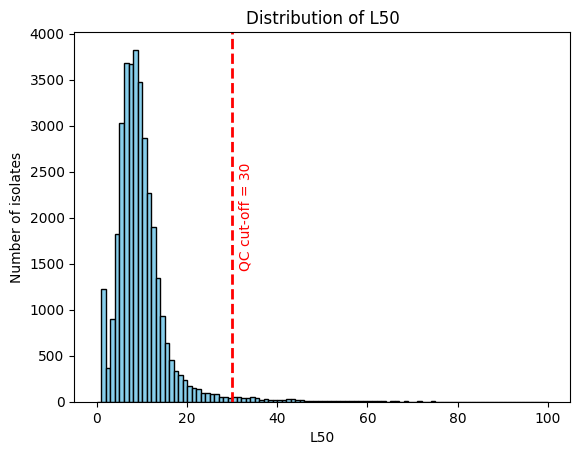

In [20]:
print(max(L50s))
cutoff=30

# distribution of Ns per 100 kbp
plt.hist(L50s, bins=100, range=(0, 100), color='skyblue', edgecolor='black')
plt.title('Distribution of L50')
plt.xlabel('L50')
plt.ylabel('Number of isolates')
plt.axvline(x=cutoff, color='red', linestyle='--', linewidth=2)
plt.text(cutoff + 1/10 * cutoff, plt.ylim()[1] * 0.5, f'QC cut-off = {cutoff}', color='red', ha='center', 
         va='center', rotation=90, rotation_mode='anchor', fontsize=10)
! mkdir -p plots
#plt.savefig('plots/histogram_L50.png', dpi=300)  # 'dpi' sets the resolution
plt.show()

58.17
49.4


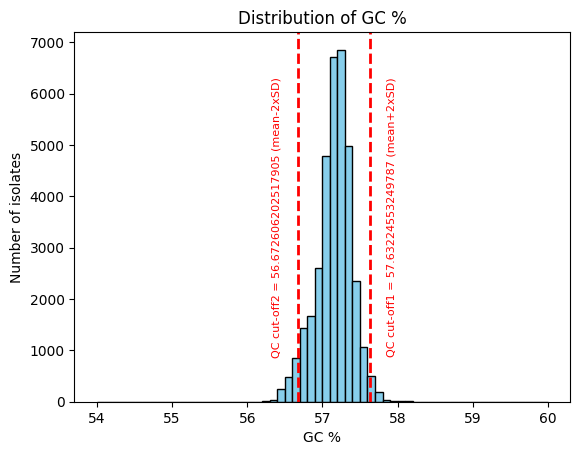

In [21]:
print(max(GCs))
print(min(GCs))
cutoff1=GCs_mean + 2*GC_std_dev
cutoff2=GCs_mean - 2*GC_std_dev
# distribution of Ns per 100 kbp
plt.hist(GCs, bins=60, range=(54, 60), color='skyblue', edgecolor='black')
plt.title('Distribution of GC %')
plt.xlabel('GC %')
plt.ylabel('Number of isolates')

plt.axvline(x=cutoff1, color='red', linestyle='--', linewidth=2)
plt.text(cutoff1 + 1/200 * cutoff1, plt.ylim()[1] * 0.5, f'QC cut-off1 = {cutoff1} (mean+2xSD)', color='red', ha='center', 
         va='center', rotation=90, rotation_mode='anchor', fontsize=8)
         
plt.axvline(x=cutoff2, color='red', linestyle='--', linewidth=2)
plt.text(cutoff2 - 1/200 * cutoff2, plt.ylim()[1] * 0.5, f'QC cut-off2 = {cutoff2} (mean-2xSD)', color='red', ha='center', 
         va='center', rotation=90, rotation_mode='anchor', fontsize=8)
         
! mkdir -p plots
#plt.savefig('plots/histogram_GC.png', dpi=300)  # 'dpi' sets the resolution
plt.show()

5674259
11156


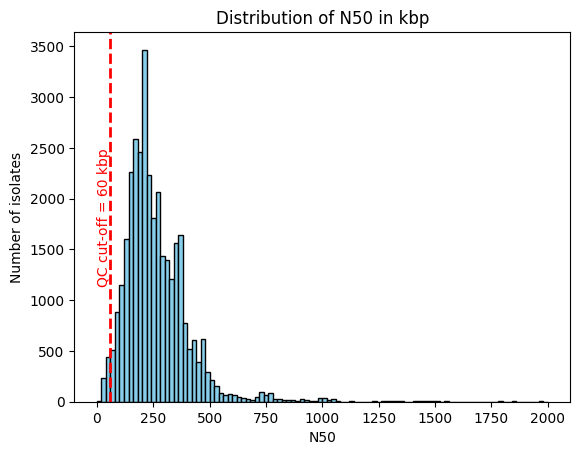

In [22]:
N50s_kbp = [x / 1000 for x in N50s]
cutoff=60 #in kbp

print(max(N50s))
print(min(N50s))
# distribution of Ns per 100 kbp
plt.hist(N50s_kbp, bins=100, range=(0, 2000), color='skyblue', edgecolor='black')
plt.title('Distribution of N50 in kbp')
plt.xlabel('N50')
plt.ylabel('Number of isolates')

plt.axvline(x=cutoff, color='red', linestyle='--', linewidth=2)
plt.text(cutoff - 1/2 * cutoff, plt.ylim()[1] * 0.5, f'QC cut-off = {cutoff} kbp', color='red', ha='center', 
         va='center', rotation=90, rotation_mode='anchor', fontsize=10)

! mkdir -p plots
#plt.savefig('plots/histogram_N50.png', dpi=300)  # 'dpi' sets the resolution
plt.show()

11052345
4698358


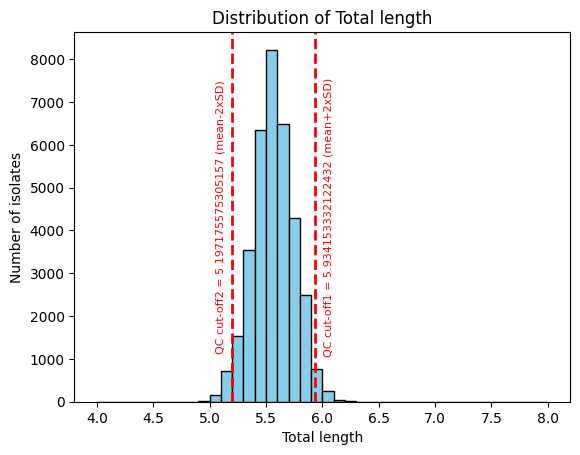

In [23]:
Total_lengths_Mbp = [x / 1000000 for x in Total_lengths]

print(max(Total_lengths))
print(min(Total_lengths))

cutoff1=TotalLength_mean/ 1000000 + 2*TotalLength_std_dev/ 1000000
cutoff2=TotalLength_mean/ 1000000 - 2*TotalLength_std_dev/ 1000000

# distribution of Ns per 100 kbp
plt.hist(Total_lengths_Mbp, bins=40, range=(4, 8), color='skyblue', edgecolor='black')
plt.title('Distribution of Total length')
plt.xlabel('Total length')
plt.ylabel('Number of isolates')

plt.axvline(x=cutoff1, color='red', linestyle='--', linewidth=2)
plt.text(cutoff1 + 1/50 * cutoff1, plt.ylim()[1] * 0.5, f'QC cut-off1 = {cutoff1} (mean+2xSD)', color='red', ha='center', 
         va='center', rotation=90, rotation_mode='anchor', fontsize=8)
         
plt.axvline(x=cutoff2, color='red', linestyle='--', linewidth=2)
plt.text(cutoff2 - 1/50 * cutoff2, plt.ylim()[1] * 0.5, f'QC cut-off2 = {cutoff2} (mean-2xSD)', color='red', ha='center', 
         va='center', rotation=90, rotation_mode='anchor', fontsize=8)
! mkdir -p plots
#plt.savefig('plots/histogram_Total_lengths_Mbp.png', dpi=300)  # 'dpi' sets the resolution
plt.show()

In [30]:
# Path to the file. Here 4 isolates that failed quast were added
file_path = "./qc_failed_isolates.txt"

# Open the file and read its contents into a list
with open(file_path, 'r') as file:
    # Read all lines and strip newline characters
    QC_failed = [line.strip() for line in file]

# Print the list to verify
print(len(QC_failed))
print(QC_failed[0])

5627
42290_SRR9858799


In [31]:
# Remove the prefix (id) or suffix(isolate name) from the names
failed_names = [entry.split('_', 1)[1] if '_' in entry else entry for entry in QC_failed]
failed_ids = [entry.split('_', 1)[0] if '_' in entry else entry for entry in QC_failed]
failed_ids =  [int(entry) for entry in failed_ids]
print(failed_names[0])
print(failed_ids[0])

SRR9858799
42290


In [32]:
# Keep rows which have isolate/id column values not in in failed_names
#df_QCed = df_QCed[~df_QCed['isolate'].isin(failed_names)] # this code didn't give correct filtering
df_QCed = df_QCed[~df_QCed['id'].isin(failed_ids)]

# Print the resulting DataFrame
print(df_QCed.shape)

(32234, 37)


In [33]:
# Find common entries between QC_failed and Ozaenae and rhenoscleromatis isolates
common_entries = list(set(ids_remove) & set(failed_ids))

# Print the common entries
print("Common entries:", common_entries)

Common entries: [51109, 30347, 51127, 51447, 51448, 346]


 So, from a total of 37874 isolates, 5623 failed the test. Thus, we end up with 32251 isolates.
 From those we also have previously removed 19 isolates that are Ozaenae or rhenoscleromatis isolates. 
 Because 6 of the Ozaenae or rhenoscleromatis isolates also failed the QC (ids: 51109, 30347, 51127, 51447, 51448, 346), 
 we end up with 32238 QC passed isolates. Finally, for 4 isolates (73882_NRZ_81308.fas, 22264_YEHE6.fas, 22265_YEHE8.fas,  22266_YEHE15.fas) QUAST couldn't make the analysis and they were removed as well. 
#### Thus, the final number of QC passed isolates that can be used is 32234

# Define the isolates to be used for scheme development with chewbbaca

In [36]:
### Remove last 6 LIN digits
df_LIN4=df_QCed.copy()

#delete
df_LIN4['LINcode (scgMLST629_S)'] = df_LIN4['LINcode (scgMLST629_S)'].apply(lambda x: '_'.join(x.split('_')[:-6]))
#number of unique LIN in LIN5
unique_LIN4 = df_LIN4['LINcode (scgMLST629_S)'].unique()
print(len(unique_LIN4))

2483


In [38]:
## For each unique LIN4 value get one (the first) corresponding BIGSDB id

# Create a dictionary to store the unique values and corresponding ids
unique_ids = {}

# Iterate over unique values and select one corresponding id for each
for value in unique_LIN4:
    # Get the first id corresponding to this unique value
    id_value = df_LIN4[df_LIN4['LINcode (scgMLST629_S)'] == value]['id'].iloc[0]
    unique_ids[value] = id_value

len(unique_ids.values())

unique_ids_list = list(unique_ids.values())

output_file = 'unique_ids_LIN4.txt'
# save the list
with open(output_file, 'w') as file:
   for item in unique_ids_list:
       file.write(f"{item}\n")

In [40]:
# Filter the DataFrame using isin
filtered_df = data[data['id'].isin(unique_ids_list)]
print(filtered_df.head(1))

   id isolate       aliases  sender  curator date_entered   datestamp  \
0   6  02A029  02A029; SB14       2      504   2006-09-05  2022-11-03   

  taxonomic_designation phylogroup_from_ST QC_status  ...  \
0         K. pneumoniae       Kp1 (7 loci)         0  ...   

   scgST (scgMLST629_S)  LINcode (scgMLST629_S) Phylogroup (scgMLST629_S)  \
0                  9677  0_0_429_0_42_0_1_0_0_0                       Kp1   

  Sublineage (scgMLST629_S) Clonal group (scgMLST629_S) ST (MLST)  \
0                      SL23                        CG23        23   

  rST (Ribosomal MLST) genus (Ribosomal MLST) species (Ribosomal MLST)  \
0                19197             Klebsiella    Klebsiella pneumoniae   

  subspecies (Ribosomal MLST)  
0                         NaN  

[1 rows x 37 columns]


# Run chewbbaca and identify cgMLST95 loci. Then, check for allele statistics and which loci match existing loci after blasting the cgMLST95 loci vs the existing loci

# Allele statistics

In [5]:
# open the file coming from SchemaEvaluator_95 (containing only the loci present in the 95% of isolates) schema_report. 
# when you open this html file you can download a table Allele Analysis
allele_analysis=pd.read_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/allele_analysis.tsv', sep='\t', header=0)   

print(allele_analysis.shape)
print(allele_analysis.head(1))

(3455, 14)
                   Locus  Total Alleles  Valid Alleles  Invalid Alleles  \
0  10-04A025-protein2602            377            377                0   

   Proportion of Validated Alleles  Distinct Protein Alleles  Incomplete ORF  \
0                                1                       191               0   

   Ambiguous Bases  Missing Start/Stop Codon  In-frame Stop Codon  \
0                0                         0                    0   

   Alleles < 0bp  Alleles below threshold  Alleles above threshold  \
0              0                        0                        0   

   Missing Allele IDs  
0                   0  


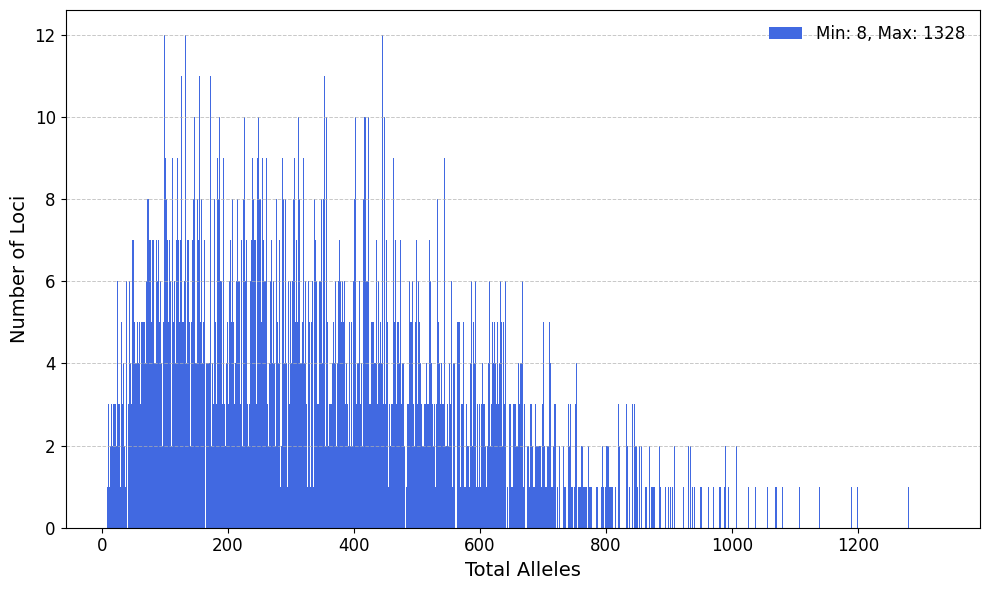

In [7]:
import matplotlib.pyplot as plt

# Calculate the range and bins
min_value = allele_analysis['Total Alleles'].min()
max_value = allele_analysis['Total Alleles'].max()
bins = max_value - min_value +1 # Number of bins equals the range (inclusive)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(
    allele_analysis['Total Alleles'], 
    bins=bins, 
    range=(min_value, max_value), 
    color='royalblue', 
    alpha=1, 
    edgecolor='black', 
    linewidth=0
)

# Add custom legend for min/max values
legend_text = f"Min: {min_value}, Max: {max_value}"
plt.legend([legend_text], loc='upper right', fontsize=12, frameon=False)

# Customizing the plot
plt.xlabel('Total Alleles', fontsize=14)
plt.ylabel('Number of Loci', fontsize=14)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot
#plt.savefig('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/plots/total_alleles_histogram.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Allele lengths

In [8]:
# For all new KpI loci
# Define directories and files
fasta_dir = "./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/fasta/"
names_file = "./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/ExtractCgMLST/ExtractCgMLST/cgMLSTschema95.txt"
output_file = "./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/allele_lengths.txt"

# Read locus names if you want to filter
with open(names_file) as f:
    loci_of_interest = set(line.strip() for line in f if line.strip())

with open(output_file, "w") as outfile:
    outfile.write("locus\tallele\tlength\n")  # write header
    for file in os.listdir(fasta_dir):
        if not (file.endswith('.fasta') or file.endswith('.fa')):
            continue
        locus = os.path.splitext(file)[0]
        # Skip loci not in cgMLST schema (only if you care)
        if loci_of_interest and locus not in loci_of_interest:
            continue
        fasta_path = os.path.join(fasta_dir, file)
        try:
            for record in SeqIO.parse(fasta_path, 'fasta'):
                # Assuming ID looks like 'locusX_S|160' etc:
                allele_name = record.id.replace('|', '_')
                allele_length = len(record.seq)
                outfile.write(f"{locus}\t{allele_name}\t{allele_length}\n")
        except FileNotFoundError:
            print(f"File {fasta_path} not found for locus {locus}.")

In [6]:
# Load the file 
allele_lengths=pd.read_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/allele_lengths.txt', sep='\t')   
print(allele_lengths.shape)
print(allele_lengths.head())

(1230383, 3)
                   locus                   allele  length
0  10-04A025-protein2602  10-04A025-protein2602_1     558
1  10-04A025-protein2602  10-04A025-protein2602_2     552
2  10-04A025-protein2602  10-04A025-protein2602_3     552
3  10-04A025-protein2602  10-04A025-protein2602_4     552
4  10-04A025-protein2602  10-04A025-protein2602_5     552


In [7]:
#Sanity check
unique_entries = allele_lengths['locus'].unique()
print(len(unique_entries))

3455


In [8]:
# Group by 'Locus' and find the row with the maximum 'Length' for each group
longest_alleles = allele_lengths.loc[allele_lengths.groupby('locus')['length'].idxmax()]
print(longest_alleles.shape)
print(longest_alleles.head())

(3455, 3)
                        locus                     allele  length
0       10-04A025-protein2602    10-04A025-protein2602_1     558
377     10513-BS76-A-protein1    10513-BS76-A-protein1_1    1419
761   10513-BS76-A-protein100  10513-BS76-A-protein100_1    1623
1429  10513-BS76-A-protein103  10513-BS76-A-protein103_1     255
1528  10513-BS76-A-protein104  10513-BS76-A-protein104_1    1131


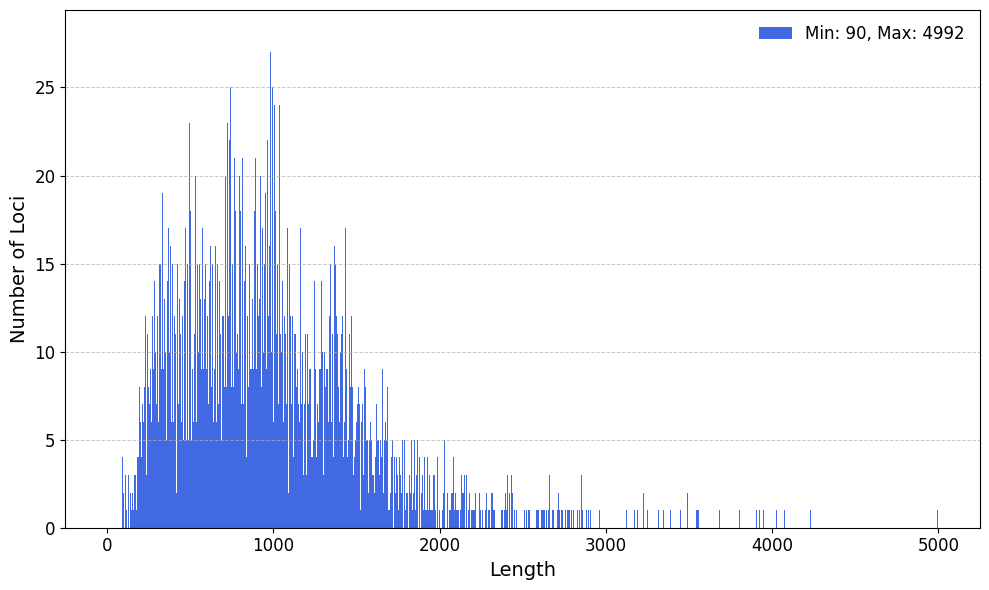

In [12]:
# Calculate the range and bins
min_value = longest_alleles['length'].min()
max_value = longest_alleles['length'].max()
bins = max_value - min_value +1 # Number of bins equals the range (inclusive)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(
    longest_alleles['length'], 
    bins=1000, 
    range=(0, 5000), 
    color='royalblue', 
    alpha=1, 
    edgecolor='black', 
    linewidth=0
)

# Add custom legend for min/max values
legend_text = f"Min: {min_value}, Max: {max_value}"
plt.legend([legend_text], loc='upper right', fontsize=12, frameon=False)

# Customizing the plot
plt.xlabel('Length', fontsize=14)
plt.ylabel('Number of Loci', fontsize=14)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot
#plt.savefig('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/plots/longest_allele_lengths.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Allele frequencies in each locus 

In [13]:
# Load the results_alleles.tsv output file of AlleleCall with only the 95 threshold loci (3455)
alleles=pd.read_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/AlleleCall/AlleleCall_95/results_alleles.tsv', sep='\t', header=0, low_memory=False)   
# Set the first column as rownames (index)
alleles.set_index(alleles.columns[0], inplace=True)

print(alleles.shape)
print(alleles.head())

# For each locus, calculate the frequency of each allele and save it in a separate file
# Directory to save the frequency files
output_dir = './Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/allele_frequencies'

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Iterate over the columns (loci) in the alleles DataFrame
for locus in alleles.columns:
    # Get the allele frequencies for the current locus
    allele_frequencies = alleles[locus].value_counts(normalize=True).reset_index()
    allele_frequencies.columns = ['allele', 'frequency']
    
    # Define the file path for the output
    output_file = os.path.join(output_dir, f'{locus}_frequencies.tsv')
    
    # Save the frequencies as a TSV file
    allele_frequencies.to_csv(output_file, sep='\t', index=False)

(2483, 3455)
                10-04A025-protein2602  10513-BS76-A-protein1  \
FILE                                                           
10513_BS76_A                        2                      1   
10572_KP_301                        3                      2   
10766_DY7045917                     4                      2   
10779_13                            5                      3   
10781_19                            6                      4   

                10513-BS76-A-protein100 10513-BS76-A-protein103  \
FILE                                                              
10513_BS76_A                          1                       1   
10572_KP_301                          2                       2   
10766_DY7045917                       3                       3   
10779_13                              4                       4   
10781_19                              5                       2   

                10513-BS76-A-protein104  10513-BS76-A-protein106  \


In [14]:
# List to collect all allele frequency data
all_allele_frequencies = []

# Iterate over the columns (loci) in the alleles DataFrame
for locus in alleles.columns:
    # Get the allele frequencies for the current locus
    allele_frequencies = alleles[locus].value_counts(normalize=True).reset_index()
    allele_frequencies.columns = ['allele', 'frequency']
    
    # Add the Locus name to the DataFrame
    allele_frequencies['locus'] = locus
    
    # Append the data to the list
    all_allele_frequencies.append(allele_frequencies)

# Combine all DataFrames into a single DataFrame
final_allele_frequencies = pd.concat(all_allele_frequencies, ignore_index=True)

# Directory to save the final frequency file
output_dir = './Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/'

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define the file path for the final output
output_file = os.path.join(output_dir, 'all_allele_frequencies.tsv')

# Save the combined DataFrame as a single TSV file
final_allele_frequencies.to_csv(output_file, sep='\t', index=False)

In [9]:
#load the file
allele_frequencies=pd.read_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/all_allele_frequencies.tsv', sep='\t', low_memory=False)   

print(allele_frequencies.shape)
print(allele_frequencies.head())

(1235159, 3)
  allele  frequency                  locus
0      7   0.133709  10-04A025-protein2602
1      9   0.072493  10-04A025-protein2602
2     13   0.031011  10-04A025-protein2602
3    370   0.029803  10-04A025-protein2602
4    371   0.028997  10-04A025-protein2602


In [10]:
allele_frequencies[allele_frequencies['allele'].str.startswith(('INF', 'PLOT3', 'PLOT5', 'LOTSC', 'NIPH', 'NIPHEM', 'ALM', 'ASM', 'PAMA', 'LNF'))]

,allele,frequency,locus
19,NIPHEM,0.011277,10-04A025-protein2602
30,LNF,0.007249,10-04A025-protein2602
107,NIPH,0.001208,10-04A025-protein2602
113,ASM,0.001208,10-04A025-protein2602
255,PLOT5,0.000403,10-04A025-protein2602
...,...,...,...
1234024,ASM,0.000805,9641-HGKP01-protein657
1234330,ASM,0.000805,9726-AUSMDU00021662-protein2192
1234528,LNF,0.030205,9726-AUSMDU00021662-protein4021
1234560,ASM,0.005236,9726-AUSMDU00021662-protein4021


In [17]:
# Check for loci containing alleles marked as 'NIPHEM', 'NIPH' (Non-Informative Paralogous Hits) by chewBBACA 
# Create an empty list to store locus names
NIPH_loci_above_threshold = []
Threshold=0.01
# Group by the 'Locus' column
grouped = allele_frequencies.groupby('locus')

# Iterate over each group
for locus, group in grouped:
    # Calculate the sum of frequencies for 'NIPHEM' and 'NIPH'
    frequency_sum = group.loc[group['allele'].isin(['NIPHEM', 'NIPH']), 'frequency'].sum()
    
    # Check if the sum is >= threshold
    if frequency_sum >= Threshold:
        #print(frequency_sum)
        NIPH_loci_above_threshold.append(locus)

# Display the result
print(len(NIPH_loci_above_threshold))

# Assuming all_loci is your list
with open("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/Non_informative_paralogous_loci_0.01.txt", "w") as f:
    for locus in NIPH_loci_above_threshold:
        f.write(f"{locus}\n")

50


In [11]:
allele_frequencies[allele_frequencies['allele']=='NIPH']

,allele,frequency,locus
107,NIPH,0.001208,10-04A025-protein2602
3210,NIPH,0.000403,10513-BS76-A-protein1088
4092,NIPH,0.000403,10513-BS76-A-protein1099
6937,NIPH,0.002014,10513-BS76-A-protein1156
11186,NIPH,0.001208,10513-BS76-A-protein1225
...,...,...,...
1223592,NIPH,0.000805,72405-A18-protein4273
1224624,NIPH,0.000403,72417-KP-F53-protein4816
1225280,NIPH,0.000805,72511-U63A-protein1335
1230388,NIPH,0.000805,8708-MyNCGM533-protein1959


In [12]:
#allele_lengths['allele'] = pd.to_numeric(allele_lengths['allele'], errors='coerce')

# Modify the Allele column to keep only the suffix after the '_'
allele_lengths['allele'] = allele_lengths['allele'].astype(str).str.split('_').str[1]

# Ensure the Allele column is numeric (convert to number, coercing errors to NaN)
# classification type counts (INF, PLOT3, PLOT5, LOTSC, NIPH, NIPHEM, ALM, ASM, PAMA, LNF) will turn to NAN
allele_lengths['allele'] = pd.to_numeric(allele_lengths['allele'], errors='coerce')
allele_frequencies['allele'] = pd.to_numeric(allele_frequencies['allele'], errors='coerce')

# merge operation
merged_df = allele_frequencies.merge(allele_lengths, on=['locus', 'allele'], how='left')

# Fill any missing 'Length' values with 0 (if the allele is not found in allele_lengths)
merged_df['length'].fillna(0, inplace=True)

# Save the merged DataFrame
merged_df.to_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/allele_frequencies_with_lengths.tsv', sep='\t', index=False)

In [13]:
print(merged_df.head())

   allele  frequency                  locus  length
0     7.0   0.133709  10-04A025-protein2602   552.0
1     9.0   0.072493  10-04A025-protein2602   552.0
2    13.0   0.031011  10-04A025-protein2602   552.0
3   370.0   0.029803  10-04A025-protein2602   552.0
4   371.0   0.028997  10-04A025-protein2602   552.0


In [14]:
# Group by Locus and Length, summing the Frequency for each group
grouped_df = merged_df.groupby(['locus', 'length'], as_index=False)['frequency'].sum()

# Save the grouped DataFrame
#grouped_df.to_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/grouped_allele_frequencies_by_length.tsv', sep='\t', index=False)
print(grouped_df.shape)
print(grouped_df.head(100))

(18286, 3)
                       locus  length  frequency
0      10-04A025-protein2602     0.0   0.021345
1      10-04A025-protein2602   495.0   0.000805
2      10-04A025-protein2602   546.0   0.005236
3      10-04A025-protein2602   549.0   0.010068
4      10-04A025-protein2602   552.0   0.944422
..                       ...     ...        ...
95  10513-BS76-A-protein1203   885.0   0.000403
96  10513-BS76-A-protein1203   888.0   0.000403
97  10513-BS76-A-protein1203   903.0   0.995167
98  10513-BS76-A-protein1204     0.0   0.000805
99  10513-BS76-A-protein1204  1155.0   0.000403

[100 rows x 3 columns]


In [15]:
# Sanity check: Sum of frequencies for each Locus should be 1
locus_frequencies_check = grouped_df.groupby('locus')['frequency'].sum()
print(locus_frequencies_check.shape)
print(locus_frequencies_check.head(100))

(3455,)
locus
10-04A025-protein2602       1.0
10513-BS76-A-protein1       1.0
10513-BS76-A-protein100     1.0
10513-BS76-A-protein103     1.0
10513-BS76-A-protein104     1.0
                           ... 
10513-BS76-A-protein1442    1.0
10513-BS76-A-protein1447    1.0
10513-BS76-A-protein1448    1.0
10513-BS76-A-protein1451    1.0
10513-BS76-A-protein1452    1.0
Name: frequency, Length: 100, dtype: float64


# Calculate allele lengths

In [3]:
# Path to the concatenated FASTA file
input_file = './Centaur_project/Klebsiella/Alleles/klebsiella_all_alleles/klebsiella_all_alleles.fa'
output_file = './Centaur_project/Klebsiella/Alleles/klebsiella_all_alleles/allele_lengths.txt'

with open(output_file, 'w') as outfile:
    outfile.write("locus\tallele\tlength\n")  # header
    for record in SeqIO.parse(input_file, 'fasta'):
        # record.id expected in form: zraP_S|160
        if "|" in record.id:
            locus, allele_suffix = record.id.split("|", 1)
            allele = record.id.replace('|', '_')
        else:
            locus = record.id
            allele = record.id  # no change if no "|"
        allele_length = len(record.seq)
        outfile.write(f"{locus}\t{allele}\t{allele_length}\n")

In [5]:
# rMLST loci lengths
fasta_dir = "./Centaur_project/Klebsiella/Alleles/rMLST/fasta/"
names_file = "./Centaur_project/Klebsiella/Alleles/rMLST/rMLST_loci.txt"
output_file = "./Centaur_project/Klebsiella/Alleles/rMLST/allele_lengths.txt"

# Read locus names to process
with open(names_file) as f:
    loci_set = set(line.strip() for line in f if line.strip())

with open(output_file, 'w') as outfile:
    outfile.write("locus\tallele\tlength\n")  # header

    for file in os.listdir(fasta_dir):
        if not (file.endswith('.fasta') or file.endswith('.fa')):
            continue
        locus = os.path.splitext(file)[0]
        if locus not in loci_set:
            continue
        fasta_path = os.path.join(fasta_dir, file)
        for record in SeqIO.parse(fasta_path, 'fasta'):
            allele = record.id.replace('|', '_')    # e.g. abc|10 -> abc_10
            allele_length = len(record.seq)
            outfile.write(f"{locus}\t{allele}\t{allele_length}\n")

# Run blast of new alleles vs old

# Open blast results between the new loci and the old loci

In [46]:
#open length info files for new loci and BIGSDB loci
new_loci_lengths = pd.read_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/allele_lengths.txt', sep='\t')   
bigsdb_loci_lengths = pd.read_csv('./Centaur_project/Klebsiella/Alleles/klebsiella_all_alleles/allele_lengths.txt', sep='\t')
rMLST_loci_length = pd.read_csv('./Centaur_project/Klebsiella/Alleles/rMLST/allele_lengths.txt', sep='\t')
bigsdb_rMLST_loci_lengths = pd.concat([bigsdb_loci_lengths, rMLST_loci_length], ignore_index=True)

# add this collumns to make the merge of this df easier
new_loci_lengths['length_new']=new_loci_lengths['length']
bigsdb_rMLST_loci_lengths['length_old']=bigsdb_rMLST_loci_lengths['length']

print(new_loci_lengths.shape)
print(new_loci_lengths.head(1))

print(bigsdb_rMLST_loci_lengths.shape)
print(bigsdb_rMLST_loci_lengths.tail(1))

(1230383, 4)
                   locus                   allele  length  length_new
0  10-04A025-protein2602  10-04A025-protein2602_1     558         558
(1064569, 4)
        locus allele  length  length_old
1064568  rpmA   rpmA     258         258


In [47]:
# open scheme info from BIGSDB
schemes_members = pd.read_csv('./Centaur_project/Klebsiella/Alleles/scheme_members.txt', sep='\t')
schemes_members=schemes_members[['scheme_id', 'locus']]

schemes = pd.read_csv('./Centaur_project/Klebsiella/Alleles/schemes.txt', sep='\t')
schemes['scheme_id']=schemes['id']
schemes['Scheme']=schemes['name']
schemes=schemes[['scheme_id', 'Scheme']]

schemes_info = schemes_members.merge(schemes, on='scheme_id')[['Scheme', 'locus']]

# add rMLST loci
rMLST_loci = pd.read_csv('./Centaur_project/Klebsiella/Alleles/rMLST/rMLST_loci.txt', sep='\t', header=None)
rMLST_loci['locus']=rMLST_loci.iloc[:,0]
rMLST_loci['Scheme'] = 'rMLST'
rMLST_loci=rMLST_loci[['Scheme', 'locus']]
# Concatenate both DataFrames
schemes_info = pd.concat([schemes_info, rMLST_loci], ignore_index=True)

# rename
schemes_info.rename(columns={'locus': 'old_locus'}, inplace=True)
schemes_info

print(schemes_info.shape)
print(schemes_info.head())



(5534, 2)
  Scheme old_locus
0   MLST      gapA
1   MLST      infB
2   MLST       mdh
3   MLST       pgi
4   MLST      phoE


In [45]:
# Open all new loci alleles against all the allele 1 from BIGSDB blast results and combine into one df 
# after filtering for the best match (based on evalue (lowest) and bitscore (highest)) for each new locus

blast_dir = './Centaur_project/Klebsiella/Alleles/klebsiella_all_alleles/BLAST_results_all_chewBBACA_alleles_VS_bigsdb_allele_1_default/'
names_file = './Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/NAMES.txt'

# Columns for BLAST results
columns = ['qseqid', 'sseqid', 'pident', 'alignment_length', 'mismatch', 'gapopen', 
           'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore']

# Initialize an empty list to store filtered DataFrames
filtered_dfs = []

# Read the fileS
with open(names_file, 'r') as f:
    loci_files = [line.strip() for line in f]

# Process each file
for locus_file in loci_files:
    file_path = f"{blast_dir}/{locus_file}"
    
    # Read the BLAST results of each locus alleles vs all bigsdb alleles. 
    df = pd.read_csv(file_path, sep='\t', names=columns)  
    # Extract new and old locus names
    df['old_locus'] = df['sseqid'].str.split('|').str[0]
    df['old_allele'] = df['sseqid'].str.replace('|', '_')
    df['new_allele'] = df['qseqid']
    
    # Perform merge with scheme data
    df = df.merge(
        schemes_info[['old_locus', 'Scheme']],
        on='old_locus',
        how='left'
        )
    
    # Replace NaN values in the 'Scheme' column with 'No_scheme' for loci with no scheme
    df['Scheme'] = df['Scheme'].fillna('no_scheme')
    
    # Perform merge with length data
    df = df.merge(
        new_loci_lengths[['allele', 'length_new']],
        left_on='new_allele',
        right_on='allele',
        how='left'
        ).drop(columns=['allele'])

    df = df.merge(
        bigsdb_rMLST_loci_lengths[['allele', 'length_old']],
        left_on='old_allele',
        right_on='allele',
        how='left'
        ).drop(columns=['allele'])
    
    # Sort
    df = df.sort_values(by=['Scheme', 'bitscore'], ascending=[True, False])

    # Keep the best match per scheme
    df = df.groupby('Scheme', as_index=False).first()
   
    # Append the filtered DataFrame to the list
    filtered_dfs.append(df)


    
# Combine all filtered DataFrames into one
combined_df = pd.concat(filtered_dfs, ignore_index=True)

bigsdb_blast=combined_df
# Save the combined DataFrame or inspect it
#bigsdb_blast.to_csv('./Centaur_project/Klebsiella/Alleles/klebsiella_all_alleles/BLAST_results_all_chewBBACA_alleles_VS_bigsdb_allele_1_default_all.tsv',sep='\t', index=False)

print(bigsdb_blast.shape)
print(bigsdb_blast.head())


(4403, 18)
                      Scheme                      qseqid           sseqid  \
0  cgMLST_ST258_ST512_ST1199   10-04A025-protein2602_370  KPNJ2_RS23620|1   
1  cgMLST_ST258_ST512_ST1199   10513-BS76-A-protein100_6  KPNJ2_RS08280|1   
2                 cgMLST_KpI   10513-BS76-A-protein104_5  KPNJ2_RS08300|1   
3  cgMLST_ST258_ST512_ST1199   10513-BS76-A-protein106_6  KPNJ2_RS08310|1   
4                 cgMLST_KpI  10513-BS76-A-protein1088_4  KPNJ2_RS13595|1   

   pident alignment_length mismatch gapopen qstart  qend sstart  send  \
0   100.0              552        0       0      1   552      1   552   
1   100.0             1623        0       0      1  1623      1  1623   
2   100.0             1131        0       0      1  1131      1  1131   
3   100.0              729        0       0      1   729      1   729   
4   100.0              249        0       0      1   249      1   249   

          evalue  bitscore      old_locus       old_allele  \
0   0.000000e+00    1020.

In [22]:
# Open all new loci alleles against the rMLST loci blast results and combine into one df 
# after filtering for the best match based on bitscore (highest) for each new locus

blast_dir = './Centaur_project/Klebsiella/Alleles/rMLST/BLAST_results_all_chewBBACA_alleles_VS_rMLST_default/'
names_file = './Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/NAMES.txt'

# Columns for BLAST results
columns = ['qseqid', 'sseqid', 'pident', 'alignment_length', 'mismatch', 'gapopen', 
           'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore']


# Initialize an empty list to store filtered DataFrames
filtered_dfs = []

# Read the files
with open(names_file, 'r') as f:
    loci_files = [line.strip() for line in f]

# Process each file
for locus_file in loci_files:
    file_path = f"{blast_dir}/{locus_file}"
    
    # Read the BLAST results of each locus alleles vs all bigsdb alleles. 
    df = pd.read_csv(file_path, sep='\t', names=columns)  
    # Extract new and old locus names
    df['old_locus'] = df['sseqid'].str.split('|').str[0]
    df['old_allele'] = df['sseqid']
    df['new_allele'] = df['qseqid']
    
    # Perform merge with scheme data
    df = df.merge(
        schemes_info[['old_locus', 'Scheme']],
        on='old_locus',
        how='left'
        )
    
    # Replace NaN values in the 'Scheme' column with 'No_scheme' for loci with no scheme
    df['Scheme'] = df['Scheme'].fillna('no_scheme')
    
    # Perform merge with length data
    df = df.merge(
        new_loci_lengths[['allele', 'length_new']],
        left_on='new_allele',
        right_on='allele',
        how='left'
        ).drop(columns=['allele'])

    df = df.merge(
        bigsdb_rMLST_loci_lengths[['allele', 'length_old']],
        left_on='old_allele',
        right_on='allele',
        how='left'
        ).drop(columns=['allele'])
    
    # Sort using this new column
    df = df.sort_values(by=['Scheme', 'bitscore'], ascending=[True, False])

    # Keep the best match per scheme
    df = df.groupby('Scheme', as_index=False).first()
   
    # Append the filtered DataFrame to the list
    filtered_dfs.append(df)
    
# Combine all filtered DataFrames into one
combined_df = pd.concat(filtered_dfs, ignore_index=True)

rMLST_blast=combined_df
# Save the combined DataFrame or inspect it
# rMLST_blast.to_csv('./Centaur_project/Klebsiella/Alleles/rMLST/BLAST_results_all_chewBBACA_alleles_VS_rMLST_default.tsv', sep='\t', index=False)

print(rMLST_blast.shape)
print(rMLST_blast.head())

(49, 18)
  Scheme                       qseqid sseqid  pident alignment_length  \
0  rMLST   10513-BS76-A-protein1744_1   rpmB   100.0              237   
1  rMLST   10513-BS76-A-protein1745_2   rpmG   100.0              168   
2  rMLST   10513-BS76-A-protein1994_4   rpsL   100.0              375   
3  rMLST   10513-BS76-A-protein1995_1   rpsG   100.0              471   
4  rMLST  10513-BS76-A-protein2588_75   rpsA   100.0             1674   

  mismatch gapopen qstart  qend sstart  send         evalue  bitscore  \
0        0       0      1   237      1   237  3.720000e-126     438.0   
1        0       0      1   168      1   168   5.890000e-88     311.0   
2        0       0      1   375      1   375   0.000000e+00     693.0   
3        0       0      1   471      1   471   0.000000e+00     870.0   
4        0       0      1  1674      1  1674   0.000000e+00    3092.0   

  old_allele                   new_allele old_locus  length_new  length_old  
0       rpmB   10513-BS76-A-protein

In [23]:
# #open all blast results (BIGSdb and rMLST)
# bigsdb_blast=pd.read_csv('./Centaur_project/Klebsiella/Alleles/klebsiella_all_alleles/BLAST_results_all_chewBBACA_alleles_VS_bigsdb_allele_1_default_all.tsv', sep='\t')
# rMLST_blast=pd.read_csv('./Centaur_project/Klebsiella/Alleles/rMLST/BLAST_results_all_chewBBACA_alleles_VS_rMLST_default.tsv', sep='\t')

# print(bigsdb_blast.shape)
# print(bigsdb_blast.head())
# print(rMLST_blast.shape)
# print(rMLST_blast.head())

In [46]:
# concatenate the rMLST and the BIGSdb loci blast results together
all_blast = pd.concat([bigsdb_blast, rMLST_blast], ignore_index=True)

print(all_blast.shape)
print(all_blast.tail())

(4452, 18)
     Scheme                          qseqid sseqid  pident alignment_length  \
4447  rMLST  29279-ERR5530422-protein4919_9   rpsH   100.0              393   
4448  rMLST  40623-SRR1610084-protein4940_2   rplK   100.0              429   
4449  rMLST  46574-SRR5973401-protein5219_2   rplL   100.0              366   
4450  rMLST       7165-KpFA35-protein4387_1   rpsB   100.0              726   
4451  rMLST       7165-KpFA35-protein4904_2   rplQ   100.0              387   

     mismatch gapopen qstart qend sstart send  evalue  bitscore old_locus  \
4447        0       0      1  393      1  393     0.0     726.0      rpsH   
4448        0       0      1  429      1  429     0.0     793.0      rplK   
4449        0       0      1  366      1  366     0.0     676.0      rplL   
4450        0       0    136  861      1  726     0.0    1341.0      rpsB   
4451        0       0      1  387      1  387     0.0     715.0      rplQ   

     old_allele                      new_allele  le

# Make the identity and coverage check

In [54]:
#check for pident (>=80) and new locus or old locus coverage (>=80)
all_blast['coverage_new'] = all_blast['alignment_length'] / all_blast['length_new']
all_blast['coverage_old'] = all_blast['alignment_length'] / all_blast['length_old']

blast_results_check_passed = all_blast[
    (all_blast['pident'] >= 80) &
    ((all_blast['coverage_new'] >= 0.8) | (all_blast['coverage_old'] >= 0.8))
]

blast_results_check_passed.to_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/blast_results_check_passed.tsv', sep='\t', index=False)

print(blast_results_check_passed.shape)
print(blast_results_check_passed.head())

(4238, 20)
                      Scheme                      qseqid           sseqid  \
0  cgMLST_ST258_ST512_ST1199   10-04A025-protein2602_370  KPNJ2_RS23620|1   
1  cgMLST_ST258_ST512_ST1199   10513-BS76-A-protein100_6  KPNJ2_RS08280|1   
2                 cgMLST_KpI   10513-BS76-A-protein104_5  KPNJ2_RS08300|1   
3  cgMLST_ST258_ST512_ST1199   10513-BS76-A-protein106_6  KPNJ2_RS08310|1   
4                 cgMLST_KpI  10513-BS76-A-protein1088_4  KPNJ2_RS13595|1   

   pident alignment_length mismatch gapopen qstart  qend sstart  send  \
0   100.0              552        0       0      1   552      1   552   
1   100.0             1623        0       0      1  1623      1  1623   
2   100.0             1131        0       0      1  1131      1  1131   
3   100.0              729        0       0      1   729      1   729   
4   100.0              249        0       0      1   249      1   249   

          evalue  bitscore      old_locus       old_allele  \
0   0.000000e+00    1020.

In [4]:
#load the file with allele frequencies with lengths
allele_frequencies=pd.read_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/allele_frequencies_with_lengths.tsv', sep='\t', low_memory=False)   

#There are certain loci that have as most prevalent allele the LNF(Loci Not Found - but stil less than 5% in all cases)
# Convert 'Allele' to numeric and filter out rows where conversion failed to avoid chosing allele which has no sequence
allele_frequencies['allele'] = pd.to_numeric(allele_frequencies['allele'], errors='coerce')
filtered_allele_frequencies = allele_frequencies.dropna(subset=['allele'])

# Group by 'Locus' and find the row with the maximum 'Frequency' for each group
frequent_alleles = filtered_allele_frequencies.loc[filtered_allele_frequencies.groupby('locus')['frequency'].idxmax()]

# keep only filtered alleles
#frequent_alleles = frequent_alleles[frequent_alleles['locus'].isin(filtered_loci)]
#frequent_alleles["allele"] = frequent_alleles["allele"].astype(int)
print(frequent_alleles.shape)
print(frequent_alleles.head(1))

(3455, 4)
   allele  frequency                  locus  length
0     7.0   0.133709  10-04A025-protein2602   552.0


# Define type alleles those with the higest frequency

In [74]:
# Calculate min_length: Length * 0.95, then round to nearest multiple of 3
frequent_alleles['min_Length'] = (((frequent_alleles['length'] * 0.95) / 3).round() * 3).astype(int)

# Calculate max_Length: Length * 1.05, then round to nearest multiple of 3
frequent_alleles['max_Length'] = (((frequent_alleles['length'] * 1.05) / 3).round() * 3).astype(int)
frequent_alleles

,allele,frequency,locus,length,min_Length,max_Length
0,7.0,0.133709,10-04A025-protein2602,552.0,525,579
382,16.0,0.061619,10513-BS76-A-protein1,1419.0,1347,1491
766,18.0,0.029400,10513-BS76-A-protein100,1623.0,1542,1704
1438,2.0,0.161498,10513-BS76-A-protein103,255.0,243,267
1538,2.0,0.055981,10513-BS76-A-protein104,1131.0,1074,1188
...,...,...,...,...,...,...
1232710,2.0,0.033830,9641-HGKP01-protein3638,1638.0,1557,1719
1233396,4.0,0.040677,9641-HGKP01-protein4149,834.0,792,876
1233886,18.0,0.080145,9641-HGKP01-protein657,738.0,702,774
1234238,7.0,0.213049,9726-AUSMDU00021662-protein2192,687.0,654,720


In [5]:
#the 3455 loci included in the 0.95 threshold cgMLST
loci_95=pd.read_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/ExtractCgMLST/ExtractCgMLST/cgMLSTschema95.txt', sep='\t', header=None)   
loci_95=list(loci_95[0])
print(len(loci_95))

# the new loci that have high frequency of NIPH+NIPHEM alleles
NIPH_loci_above_threshold = pd.read_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/Non_informative_paralogous_loci_0.01.txt', sep='\t', header=None)
NIPH_loci_above_threshold=list(NIPH_loci_above_threshold[0])
print(len(NIPH_loci_above_threshold))

# open
blast_results_check_passed = pd.read_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/blast_results_check_passed.tsv', sep='\t')
blast_results_check_passed['new_locus'] = blast_results_check_passed['qseqid'].str.split('_').str[0]
# new loci which matching the scgMLST and rMLST loci
scgMLST = blast_results_check_passed[blast_results_check_passed['Scheme']=='scgMLST629_S']
scgMLST_loci=list(scgMLST['new_locus'])
rMLST = blast_results_check_passed[blast_results_check_passed['Scheme']=='rMLST']
rMLST_loci=list(rMLST['new_locus'])
print(len(scgMLST))
print(len(rMLST))

filtered_loci = set(set(loci_95) - set(NIPH_loci_above_threshold) - set(scgMLST_loci) - set(rMLST_loci))
len(filtered_loci)

3455
50
562
49


2798

In [37]:
# Directory containing the locus fasta files
locus_dir = './Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/CreateSchema/CreateSchema/schema/'
destination_dir='./Centaur_project/Klebsiella/Alleles/type_alleles/'

# Function to get the sequence for a specific allele from a locus file
def get_allele_sequence(locus, allele_number):
    fasta_file = os.path.join(locus_dir, f"{locus}.fasta")
    for record in SeqIO.parse(fasta_file, "fasta"):
        if record.id == f"{locus}_{allele_number}":
            return record.seq

sequences = []
for locus in filtered_loci:
    allele_number = int(frequent_alleles.loc[frequent_alleles['locus'] == locus, 'allele'].item())
    sequence = get_allele_sequence(locus, allele_number)
    if sequence:
        sequences.append((f"{locus}_{allele_number}", sequence))
    
# Write sequences to a new fasta file for the isolate    
with open(f"{destination_dir}frequent_type_alleles.fasta", "w") as output_handle:
    for name, seq in sequences:
        output_handle.write(f">{name}\n{seq}\n")

In [38]:
# from the fasta files containing the alleles of each isolates used for type alleles, extract locus and sequence
destination_dir='./Centaur_project/Klebsiella/Alleles/type_alleles/'

# Initialize an empty list to store locus and sequence information
data = []  
# Parse the FASTA file
for record in SeqIO.parse('./Centaur_project/Klebsiella/Alleles/type_alleles/frequent_type_alleles.fasta', "fasta"):
    header = record.id  
    sequence = str(record.seq) 
        
    # Extract the locus name (everything before the last '_')
    locus = "_".join(header.split("_")[:-1])
        
    # Append the data
    data.append({"locus": locus, "sequence": sequence})
    
# Create a pandas DataFrame
frequent_locus_sequences = pd.DataFrame(data)
    
# Save the DataFrame to a TSV file named after the isolate
output_filename = "./Centaur_project/Klebsiella/Alleles/type_alleles/frequent_locus_sequences.tsv"
frequent_locus_sequences.to_csv(output_filename, sep='\t', index=False)

In [70]:
# open type sequences info 
frequent_locus_sequences=pd.read_csv("./Centaur_project/Klebsiella/Alleles/type_alleles/frequent_locus_sequences.tsv", sep='\t')
print(frequent_locus_sequences.shape)
print(frequent_locus_sequences.head(1))

(2798, 2)
                     locus                                           sequence
0  10513-BS76-A-protein856  ATGAAAATCCTGTCCGTGCGTCACGCCGCCCTCCCGGCCCTGCTCT...


# Open annotation results (bakta)

In [91]:
# Get gene info from GBFF files produced by bakta
base_dir = './Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/bakta_results/'
loci_file = './Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/ExtractCgMLST/ExtractCgMLST/cgMLSTschema95.txt'

# Output files
gene_output = 'gene_info.tsv'
product_output = 'product_info.tsv'
tag_output = 'tag_info.tsv'


# Function to extract gene and product information
def extract_info_from_gbff(file):
    gene_name = "N/A"
    locus_tag = "N/A"
    product_name = "N/A"

    
    for record in SeqIO.parse(file, "genbank"):
        for feature in record.features:
            if feature.type == "gene":
                gene_name = feature.qualifiers.get('gene', ['N/A'])[0]
                locus_tag = feature.qualifiers.get('locus_tag', ['N/A'])[0]
            if feature.type == "CDS":
                product_name = feature.qualifiers.get('product', ['N/A'])[0]

    return gene_name, locus_tag, product_name

# Read the loci names from the file
with open(loci_file, 'r') as lf:
    loci_list = [line.strip() for line in lf]

# Open the output files for writing
with open(gene_output, 'w') as gene_file, open(tag_output, 'w') as tag_file, open(product_output, 'w') as product_file:
    # Write headers
    gene_file.write("Locus\tGene\n")
    tag_file.write("Locus\tLocus_tag\n")
    product_file.write("Locus\tProduct\n")
    
    
    
    # Iterate over each locus
    for locus in loci_list:
        # Construct the path to the GBFF file
        gbff_path = os.path.join(base_dir, locus, 'KpI_cgMLST_new.gbff')
        
        if os.path.exists(gbff_path):
            # Extract gene, locus tag, product and pseudogene type info
            gene, tag, product = extract_info_from_gbff(gbff_path)
            
            # Write the locus, gene, and product to the respective TSV files
            gene_file.write(f"{locus}\t{gene}\n")
            tag_file.write(f"{locus}\t{tag}\n")
            product_file.write(f"{locus}\t{product}\n")
            
        else:
            print(f"File not found: {gbff_path}")

File not found: ./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/bakta_results/24797-ERR4982115-protein1321/KpI_cgMLST_new.gbff


In [93]:
# open the bakta info files
gene = pd.read_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/gene_info.tsv', sep='\t')
product = pd.read_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/product_info.tsv', sep='\t')
tag = pd.read_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/tag_info.tsv', sep='\t')

#Merge annotation info
bakta = gene.merge(product[['Locus', 'Product', ]], on='Locus', how='inner')
bakta = bakta.merge(tag[['Locus', 'Locus_tag', ]], on='Locus', how='inner')

# Create the new row for non annotated locus 24797-ERR4982115-protein1321 as a DataFrame
new_row = pd.DataFrame([{'Locus': '24797-ERR4982115-protein1321'}])

# Concatenate the new row with the original DataFrame
bakta = pd.concat([bakta, new_row], ignore_index=True)

# add length info
lengths = pd.read_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/locus_lengths.txt', sep='\t')
bakta = bakta.merge(lengths[['Locus','Num_Alleles', 'Min_Length', 'Max_Length', 'Median_Length' ]], on='Locus', how='inner')
bakta.to_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/full_gene_info.tsv', sep='\t', index=False)
print(bakta.shape)
print(bakta.head(1))

(3455, 8)
                   Locus Gene      Product     Locus_tag  Num_Alleles  \
0  10-04A025-protein2602  NaN  Lipoprotein  KNIBAF_00005          377   

   Min_Length  Max_Length  Median_Length  
0         495         558            552  


In [71]:
# open annotations info 
annotations=pd.read_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/full_gene_info.tsv', sep='\t')
print(annotations.shape)
print(annotations.head(1))

(3455, 8)
                   Locus Gene      Product     Locus_tag  Num_Alleles  \
0  10-04A025-protein2602  NaN  Lipoprotein  KNIBAF_00005          377   

   Min_Length  Max_Length  Median_Length  
0         495         558            552  


In [75]:
# merge 
type_alleles_with_length = pd.merge(frequent_locus_sequences, frequent_alleles[['locus', 'length']], 
                                         left_on='locus', right_on='locus', how='inner')

type_alleles_with_annotations = pd.merge(type_alleles_with_length, annotations[['Locus', 'Gene', 'Product']], 
                                         left_on='locus', right_on='Locus', how='inner')
#Drop the 'Locus' column after the merge
type_alleles_with_annotations = type_alleles_with_annotations.drop(columns='Locus')

type_alleles_with_annotations['length'] = type_alleles_with_annotations['length'].astype(int)

type_alleles_with_annotations

,locus,sequence,length,Gene,Product
0,10513-BS76-A-protein856,ATGAAAATCCTGTCCGTGCGTCACGCCGCCCTCCCGGCCCTGCTCT...,2106,pqqU,TonB-dependent receptor PqqU
1,22375-299-17-protein3640,ATGCGCATTTTTATCGATGATGGTTCAACCAATATCAAAATGCTGT...,957,NaN,Chaperonin GroEL
2,13662-SPARK-2311-C1-protein2840,ATGGTTACTGCATTAATCATCGTCGCCGCCATCGCCTGGCTTACCC...,360,gutM,transcriptional regulator GutM
3,10513-BS76-A-protein43,ATGGAAAAAGATCCTATTCCTCAGGCCACGTCGCCCCTGGCTACGT...,1269,folC,bifunctional tetrahydrofolate synthase/dihydro...
4,24475-ERR4549875-protein3310,ATGCAACAGCTGAAACAGCAGGTGTTCGAGGCCAATATGGATCTGC...,687,araD,L-ribulose-5-phosphate 4-epimerase
...,...,...,...,...,...
2793,10513-BS76-A-protein968,GTGATCGTTCCCGCTTTTAGCCAAGGTCTTTACGGCCGTTTACGCC...,696,tenA,thiaminase II
2794,13676-SPARK-2332-C1-protein1910,ATGATAAAAATTGCGCGCATTGCCGTGACGTTGGGTTTGCTTTCCT...,1434,NaN,capsule assembly Wzi family protein
2795,10513-BS76-A-protein4296,ATGAAGCAGGCATTACGAGTAGCATTTGGTTTTTTAATGCTGTGGG...,1293,tolB,Tol-Pal system protein TolB
2796,12091-MVK-04F037-protein1018,ATGACAACCTGCACCTCGCGCGCGGCATGGCTGAACCTGCTGCGTC...,1371,piuB,PepSY-associated TM region


# After BIGSdb integration of the new cgMLST95 loci and allele calling check for loci with low allele call rate (<90%)

In [66]:
##### set-up (LIN4 isolates)
project172_test=pd.read_excel("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/Kpn_cgMLST_setup_isolates_before_filtering_10%missing_loci.xlsx")
project172_scg_test=project172_test.iloc[:, 2:631]
project172_kpn_test = project172_test.iloc[:, 631:]
print('scgMLST629' + '\n')
print(project172_scg_test.shape)
print(project172_scg_test.head(1))
print('KpnMLST' + '\n')
print(project172_kpn_test.shape)
print(project172_kpn_test.head(1))

scgMLST629

(2483, 629)
   rbsC_S  rbsB_S  rbsK_S  yieP_S  polA_S  engB_S  KP1_0026_S  hemN_S  glnG_S  \
0     1.0     1.0     1.0     1.0     1.0     1.0           1     1.0     1.0   

   glnL_S  ...  KP1_5367_S  glpF_S  glpK_S  gltS_S  yicE_S  atpF_S  atpE_S  \
0     1.0  ...           1     1.0     1.0     1.0     1.0     1.0     1.0   

   atpB_S  atpI_S  gidB_S  
0     1.0     1.0       1  

[1 rows x 629 columns]
KpnMLST

(2483, 2805)
   6700-ME170655-protein4012  1810-blaNDM-1-protein69  \
0                        2.0                      2.0   

   45498-SRR8174948-protein1006  57660-27-72-protein3694  \
0                           2.0                      1.0   

   22344-569-protein2989  10513-BS76-A-protein1623  \
0                    NaN                       NaN   

   29432-ERR5751894-protein606  29916-ERR6294184-protein2814  \
0                          2.0                           2.0   

   45982-SRR5810503-protein1990  1740-MGH-19-protein3489  ...  \
0              

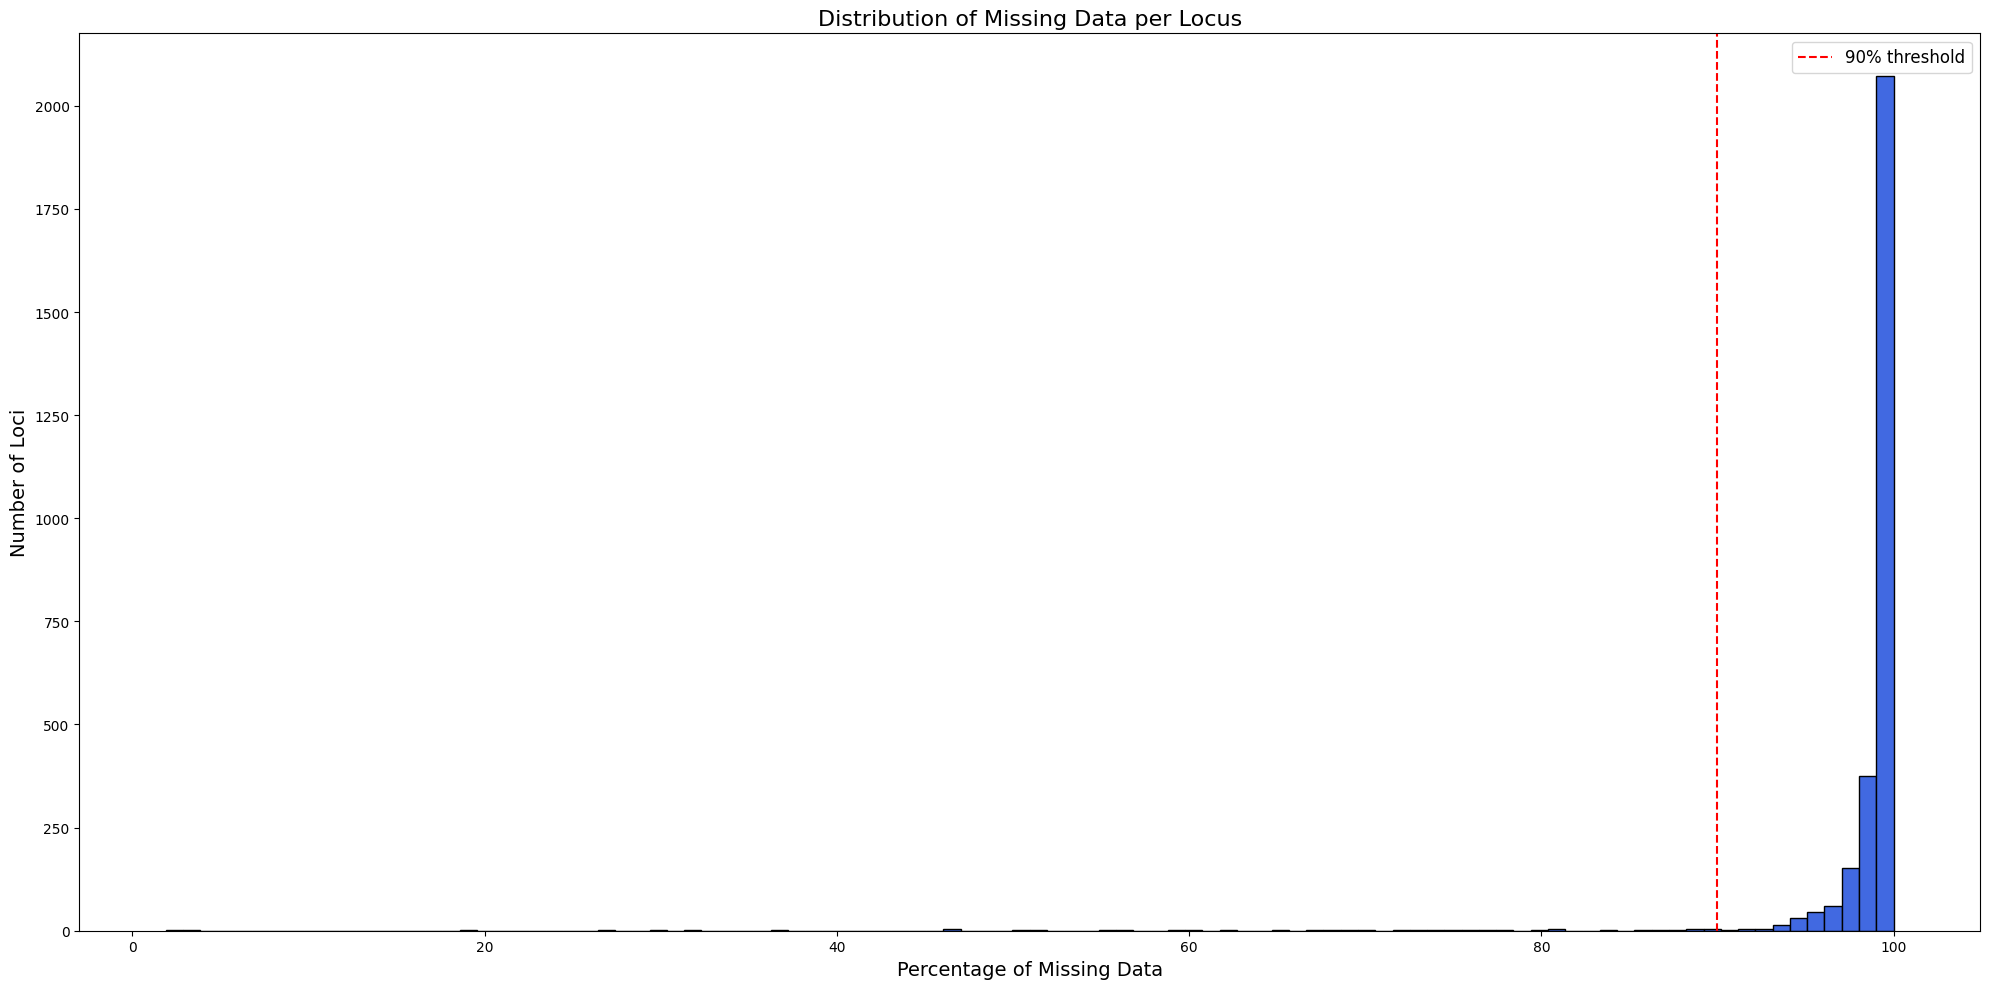

Total number of tested isolates: 2483
Loci with more than 10% missing in the isolates: 46
Average percentage of allele calls per locus: 98.62%


In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the percentage identification for each locus
total_isolates = project172_kpn_test.shape[0]
total_loci=project172_kpn_test.shape[1]
percent_present_per_locus = 100 - (project172_kpn_test.isna().sum() / total_isolates) * 100

# Identify loci with more than 10% missing data
loci_above_10_percent_missing = percent_present_per_locus[percent_present_per_locus < 90].index.tolist()

# Save as a text file
with open("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/LIN4_missing_loci_10%.txt", "w") as file:
    for item in loci_above_10_percent_missing:
        file.write(f"{item}\n")

# Sort the percentages in ascending order 
percent_present_sorted = percent_present_per_locus.sort_values(ascending=True)

# Create the histogram
plt.figure(figsize=(20, 10)) 
plt.hist(percent_present_sorted.values, bins=100, color='royalblue', edgecolor='black')

# Enhance the plot
plt.title('Distribution of Missing Data per Locus', fontsize=16)
plt.xlabel('Percentage of Missing Data', fontsize=14)
plt.ylabel('Number of Loci', fontsize=14)

# Add a vertical line at 10% for reference
plt.axvline(x=90, color='red', linestyle='--', label='90% threshold')

# Add a legend
plt.legend(fontsize=12)

# Adjust layout
plt.tight_layout()

plt.savefig("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/plots/Percentage_of_missing_loci_LIN4_before_removing_loci_with_10%missing.png")

# Show the plot
plt.show()

# Print some statistics
print(f"Total number of tested isolates: 2483")
print("Loci with more than 10% missing in the isolates: " + str(len(loci_above_10_percent_missing)))
print(f"Average percentage of allele calls per locus: {percent_present_sorted.mean():.2f}%")

# # Print the loci with more than 10% missing data
# print("Loci with more than 10% missing data:", loci_above_10_percent_missing)


In [78]:
# filter type alleles files
type_alleles_with_annotations_filtered = type_alleles_with_annotations[~type_alleles_with_annotations['locus'].isin(loci_above_10_percent_missing)]
#save
type_alleles_with_annotations_filtered.to_csv('./Centaur_project/Klebsiella/Alleles/type_alleles/type_alleles_with_length_annotations_filtered_2752loci.tsv', sep='\t', index=False)
type_alleles_with_annotations_filtered.to_excel('./Centaur_project/Klebsiella/Alleles/type_alleles/type_alleles_with_length_annotations_filtered_2752loci.xlsx',  index=False)
print(type_alleles_with_annotations_filtered.shape)
print(type_alleles_with_annotations_filtered.head(1))

(2752, 5)
                     locus                                           sequence  \
0  10513-BS76-A-protein856  ATGAAAATCCTGTCCGTGCGTCACGCCGCCCTCCCGGCCCTGCTCT...   

   length  Gene                       Product  
0    2106  pqqU  TonB-dependent receptor PqqU  


# Thus, the Kpn cgMLST scheme contains 2752 loci

# Statistics of the 2752 Kpn loci

In [84]:
# Remove columns using the drop method
project172_kpn_filtered = project172_kpn_test[list(filtered_loci)]
print(project172_kpn_filtered.shape)
print(project172_kpn_filtered.head(1))


(2483, 2798)
   27166-DRR138480-protein1229  10513-BS76-A-protein3164  \
0                          1.0                       2.0   

   26120-ERR4795839-protein3930  10766-DY7045917-protein3970  \
0                           NaN                          2.0   

   24089-ERR4367547-protein3960  10513-BS76-A-protein138  \
0                           2.0                      2.0   

   24152-ERR4367681-protein1175  28375-ERR3416357-protein3750  \
0                           2.0                           2.0   

   10513-BS76-A-protein1610  13991-SPARK-336-C1-protein2694  ...  \
0                       NaN                             2.0  ...   

   10513-BS76-A-protein3863  10513-BS76-A-protein4361  \
0                         2                         1   

   4527-SB5481-protein4513  10513-BS76-A-protein4431  \
0                      2.0                       2.0   

   59799-ACESH01610-protein225  50683-GCA-002119085-1-protein2745  \
0                          1.0                     

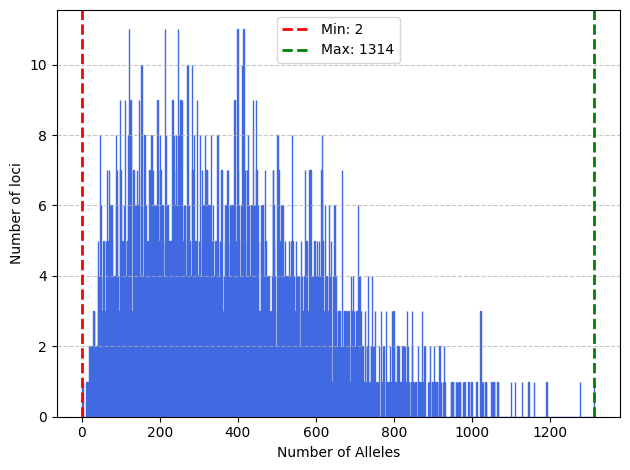

In [85]:
# Number of alleles
# Create a simple histogram with the distribution of alleles per locus
# Find the number of unique alleles for each locus
unique_alleles_per_locus = project172_kpn_filtered.nunique(dropna=True)

# Calculate min and max values
min_alleles = min(unique_alleles_per_locus)
max_alleles = max(unique_alleles_per_locus)

# Plot the histogram
plt.hist(unique_alleles_per_locus, bins=max(unique_alleles_per_locus), color="royalblue", edgecolor="royalblue")

# Add vertical lines for min and max values
plt.axvline(min_alleles, color='red', linestyle='dashed', linewidth=2, label=f'Min: {min_alleles}')
plt.axvline(max_alleles, color='green', linestyle='dashed', linewidth=2, label=f'Max: {max_alleles}')

# Add labels and title
#plt.title("Distribution of the number of alleles per Locus")
plt.xlabel("Number of Alleles")
plt.ylabel("Number of loci")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.savefig("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/plots/Nubmber_of_alleles_LIN4_2752loci.png")

# Show the plot
plt.show()


In [86]:
# Number of alleles statistics
median_alleles = np.median(unique_alleles_per_locus)
mean_alleles=np.mean(unique_alleles_per_locus)
std_alleles=np.std(unique_alleles_per_locus)

print(median_alleles)
print(mean_alleles)
print(std_alleles)

345.0
371.8227305218013
220.54116953632465


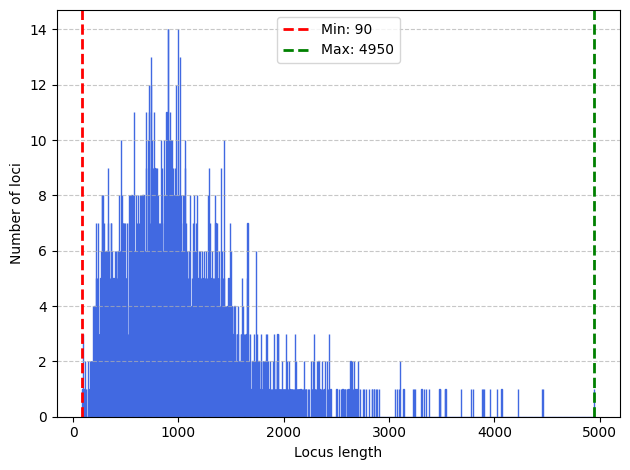

In [31]:
# Allele lengths
# Create a simple histogram with the distribution of alleles per locus
# Find the number of unique alleles for each locus
allele_lengths=type_alleles_with_annotations_filtered['length']

# Calculate min and max values
min_lengths = min(allele_lengths)
max_lengths = max(allele_lengths)

# Plot the histogram
plt.hist(allele_lengths, bins=max(allele_lengths), color="royalblue", edgecolor="royalblue")


# Add vertical lines for min and max values
plt.axvline(min_lengths, color='red', linestyle='dashed', linewidth=2, label=f'Min: {min_lengths}')
plt.axvline(max_lengths, color='green', linestyle='dashed', linewidth=2, label=f'Max: {max_lengths}')

# Add labels and title
#plt.title("Distribution of the length of alleles per Locus")
plt.xlabel("Locus length")
plt.ylabel("Number of loci")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.savefig("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/plots/Allele_lengths_LIN4_2752loci.png")

# Show the plot
plt.show()

In [32]:
# Number of alleles statistics
allele_lengths=type_alleles_with_annotations_filtered['length']
median_lengths = np.median(allele_lengths)
mean_lengths=np.mean(allele_lengths)
std_lengths=np.std(allele_lengths)

print(median_lengths)
print(mean_lengths)
print(std_lengths)

918.0
1008.2648982558139
581.4271922619275


# Identification percentage per isolate

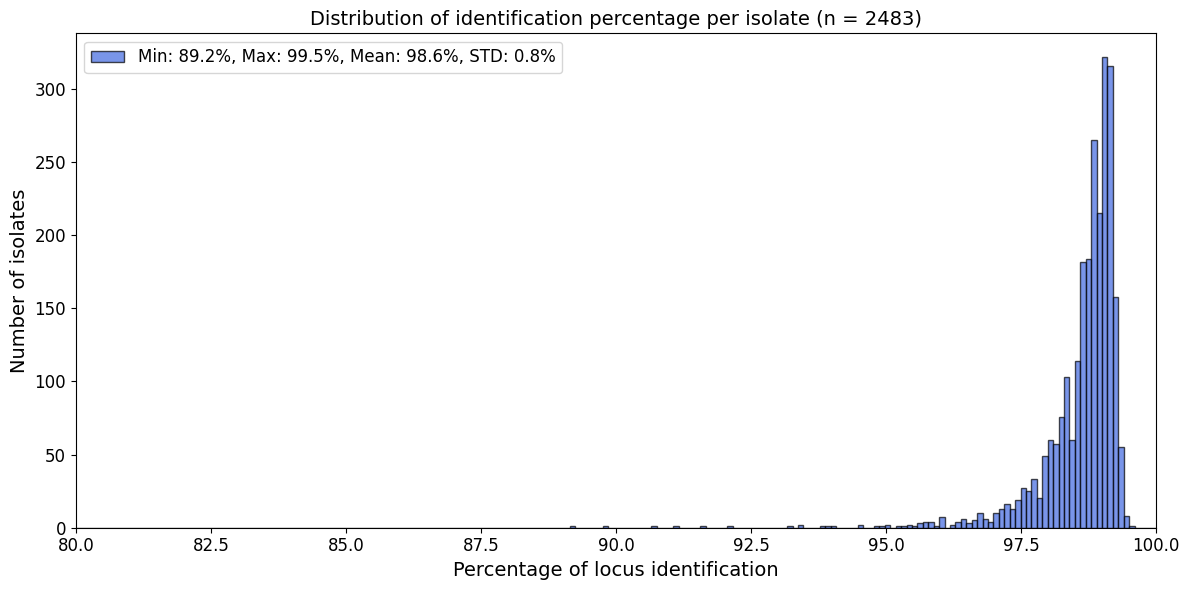

In [33]:
# Calculate the percentage of missing/identified data for each isolate
percent_present_per_isolate = 100 - (project172_kpn_filtered.isna().sum(axis=1) / project172_kpn_filtered.shape[1]) * 100

# statistics
min_kpn = np.min(percent_present_per_isolate)
max_kpn = np.max(percent_present_per_isolate)
mean_kpn = np.mean(percent_present_per_isolate)
std_kpn = np.std(percent_present_per_isolate)

# Define bins
bins = np.linspace(80, 100, 200)

# Create the histogram
plt.figure(figsize=(12, 6))
plt.hist(percent_present_per_isolate, bins=bins, alpha=0.7, color='royalblue', edgecolor='black', label=f'Min: {min_kpn:.1f}%, Max: {max_kpn:.1f}%, Mean: {mean_kpn:.1f}%, STD: {std_kpn:.1f}%')

# Enhance the plot
plt.title(f'Distribution of identification percentage per isolate (n = {project172_kpn_filtered.shape[0]})', fontsize=14)
plt.xlabel('Percentage of locus identification', fontsize=14)
plt.ylabel('Number of isolates', fontsize=14)
plt.legend(fontsize=12)

# Limit x-axis from 80% to 100%
plt.xlim(80, 100)

# Remove bar labels (if previously set)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout
plt.tight_layout()

# Save the plot
#plt.savefig("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/plots/setup_isolates_after_filtering.png")

# Show the plot
plt.show()

In [34]:
len(percent_present_per_isolate[percent_present_per_isolate<95])

17

# Plotting Number of alleles vs locus length

In [35]:
#count the number of unique alleles per locus
unique_alleles_per_locus = project172_kpn_filtered.nunique(dropna=True).reset_index()
unique_alleles_per_locus.columns = ["locus", "allele_numbers"]
print(unique_alleles_per_locus.head(1))
# Merge with the frequent_alleles df which has the length data based on the "Locus" column
allele_info_merged = pd.merge(frequent_alleles, unique_alleles_per_locus, on="locus", how="inner") 
print(allele_info_merged.head(1))

                      locus  allele_numbers
0  10513-BS76-A-protein2465             551
   allele  frequency                  locus  length  min_Length  max_Length  \
0    16.0   0.061619  10513-BS76-A-protein1  1419.0        1347        1491   

   allele_numbers  
0             383  


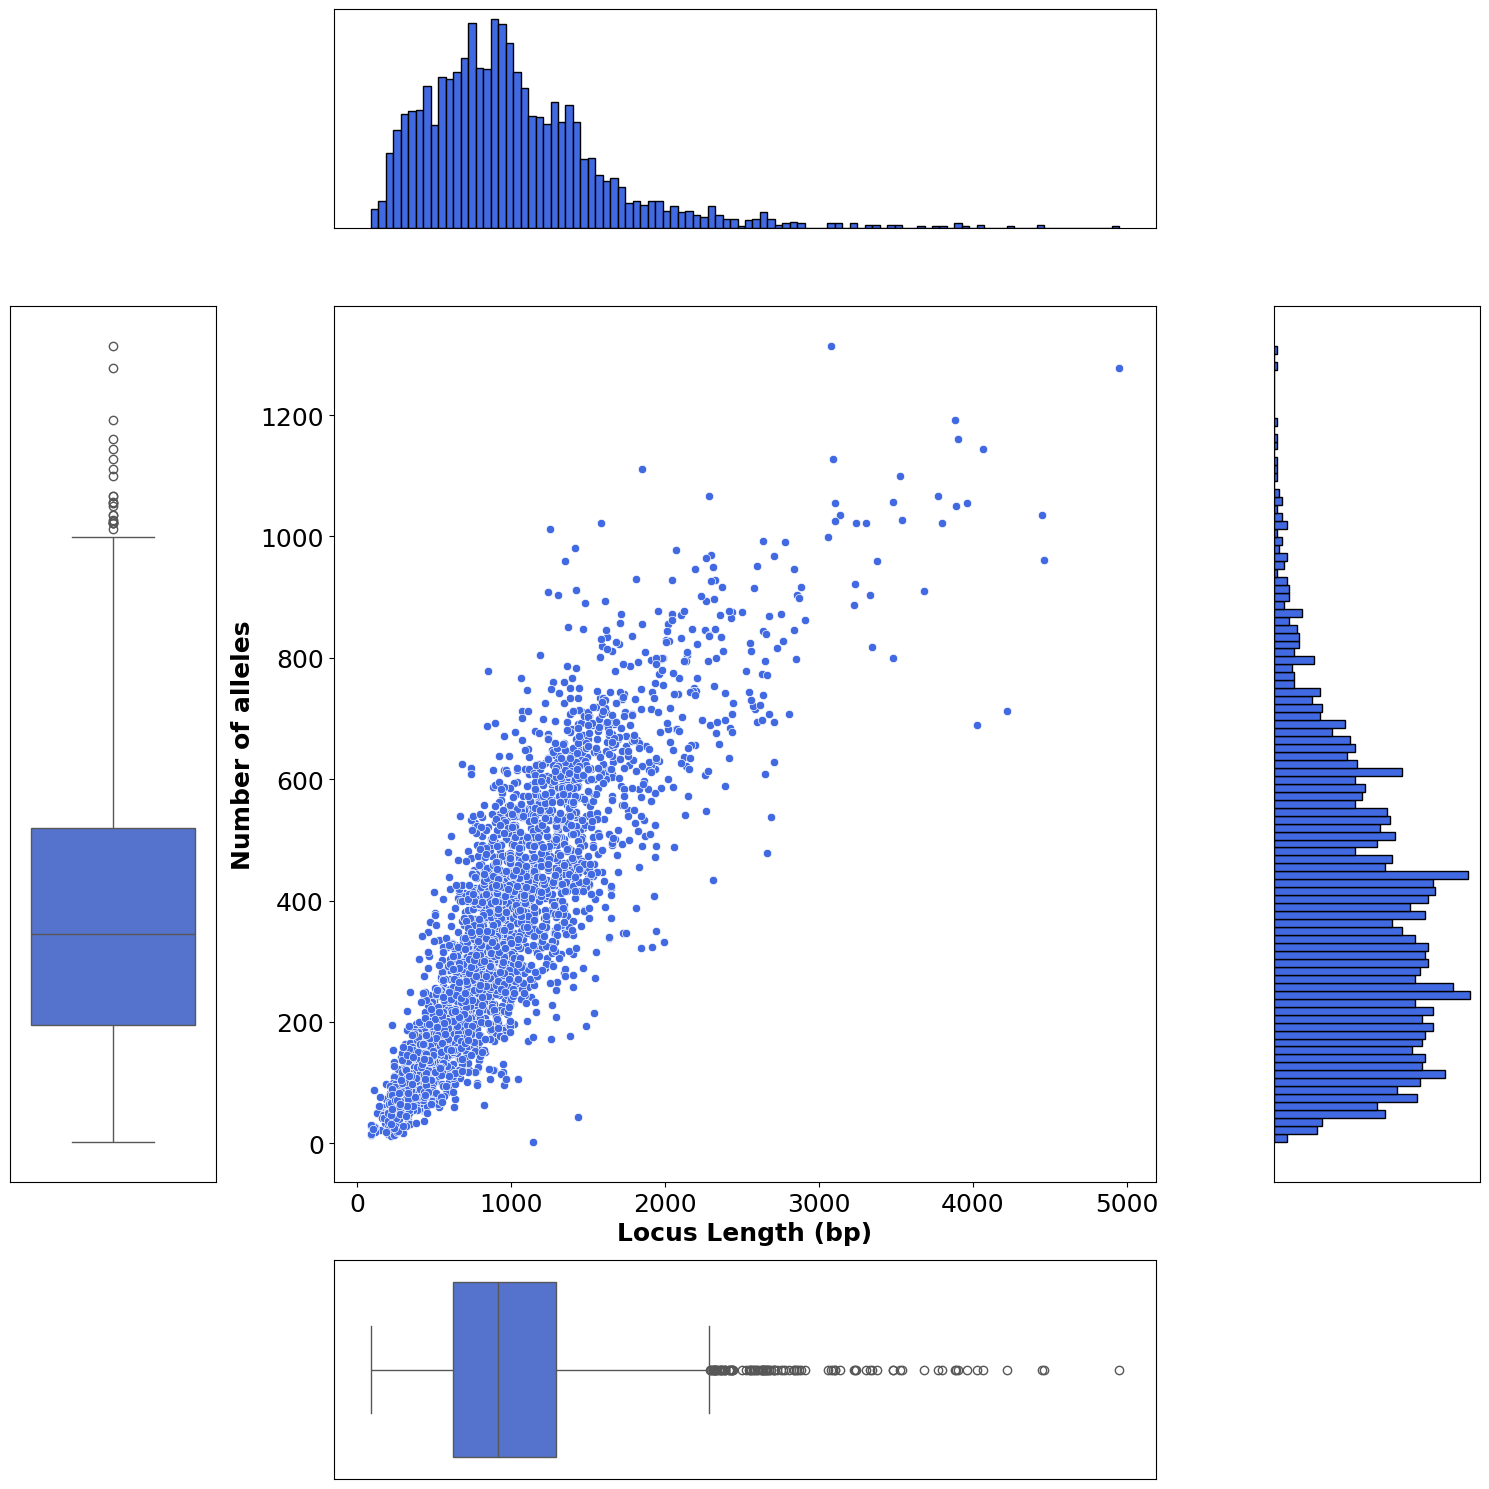

In [36]:
import seaborn as sns

# Set up the figure with a 3x3 grid of subplots, making the center plot larger
fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(3, 3, width_ratios=[1, 4, 1], height_ratios=[1, 4, 1])

# Upper part: distribution of locus lengths (x-axis)
ax1 = fig.add_subplot(gs[0, 1])  # Top-center part
ax1.hist(allele_info_merged['length'], bins=100, edgecolor='black', color='royalblue')
# Remove labels and grid
ax1.set_title('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(False)

# Bottom part: boxplot of locus lengths
ax2 = fig.add_subplot(gs[2, 1])  # Bottom-center part
sns.boxplot(x=allele_info_merged['length'], ax=ax2, color='royalblue')
ax2.set_title('')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(False)

# Left part: boxplot of allele numbers (vertical)
ax4 = fig.add_subplot(gs[1, 0])  # Middle-left part
sns.boxplot(y=allele_info_merged['allele_numbers'], ax=ax4, color='royalblue')
ax4.set_title('')
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.grid(False)

# Right part: distribution of allele numbers (horizontal)
ax3 = fig.add_subplot(gs[1, 2])  # Middle-right part
ax3.hist(allele_info_merged['allele_numbers'], bins=100, orientation='horizontal', edgecolor='black', color='royalblue')
ax3.set_title('')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(False)

# Scatter plot in the center for locus length vs allele numbers
ax5 = fig.add_subplot(gs[1, 1])  # Center part
sns.scatterplot(x='length', y='allele_numbers', data=allele_info_merged, ax=ax5, color='royalblue')
ax5.set_xlabel('Locus Length (bp)', fontsize=18, fontweight='bold')  # Bold axis label
ax5.set_ylabel('Number of alleles', fontsize=18, fontweight='bold')  # Bold axis label

# Remove grid and ticks from the side plots
for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xticks([])
    ax.set_yticks([])

# Increase font size for axis tick labels only in the center plot
ax5.tick_params(axis='both', which='major', labelsize=18)

# Adjust the layout to avoid overlap
plt.tight_layout()
#save
plt.savefig("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/plots/Nubmber_of_alleles_vs_Locus_length_2752loci.png")

#display
plt.show()

In [88]:
#### Count basic statistics on missing data in the tested isolates
# Calculate the percentage of missing data for each locus
project172_kpn_2752 = project172_kpn_filtered.drop(columns=loci_above_10_percent_missing)
total_isolates = project172_kpn_2752.shape[0]
total_loci=project172_kpn_2752.shape[1]

percent_missing_per_locus = (project172_kpn_2752.isna().sum() / total_isolates) * 100
percent_present_per_locus = 100 - (project172_kpn_2752.isna().sum() / total_isolates) * 100
missing_per_isolate = project172_kpn_2752.isna().sum(1)
percent_present_per_isolate = 100 - (project172_kpn_2752.isna().sum(axis=1) / project172_kpn_2752.shape[0]) * 100
percent_missing_per_isolate = (project172_kpn_2752.isna().sum(1) / total_loci) * 100

mean_percent_present_per_locus = np.mean(percent_present_per_locus)
std_percent_present_per_locus = np.std(percent_present_per_locus) 

mean_percent_present_per_isolate = np.mean(percent_present_per_isolate)
std_percent_present_per_isolate = np.std(percent_present_per_isolate) 

print(mean_percent_present_per_locus)
print(std_percent_present_per_locus)
print(mean_percent_present_per_isolate)
print(std_percent_present_per_isolate)

# count the number of isolates with more than or equal to 138 missing loci (5% of 2752)
isolates_above_138 = sum(1 for x in missing_per_isolate if x >= 138)
print(isolates_above_138)


99.19553252816829
1.1821023143322686
99.10837918546883
0.8681672511598728
13


# Validation datasets

### MRSN isolates

In [3]:
# MRSN isolates
MRSN=pd.read_excel("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/MRSN_2752.xlsx")
MRSN_KpnMLST= MRSN.iloc[:,2:2761]
print('KpnMLST' + '\n')
print(MRSN_KpnMLST.shape)
print(MRSN_KpnMLST.head(1))

KpnMLST

(1587, 2752)
   Kpn0001  Kpn0002  Kpn0003  Kpn0004  Kpn0005  Kpn0006  Kpn0007  Kpn0008  \
0        5        1      4.0      1.0     11.0     12.0     11.0      1.0   

   Kpn0009  Kpn0010  ...  Kpn2750  Kpn2751  Kpn2752  Kpn2753  Kpn2754  \
0      9.0      1.0  ...     10.0     11.0      1.0    118.0     10.0   

   Kpn2755  Kpn2756  Kpn2757  Kpn2758  Kpn2759  
0      9.0      1.0     10.0     12.0      NaN  

[1 rows x 2752 columns]


In [4]:
# Calculate the percentage of missing data for each locus
total_isolates = MRSN_KpnMLST.shape[0]
total_loci=MRSN_KpnMLST.shape[1]

percent_missing_per_locus = (MRSN_KpnMLST.isna().sum() / total_isolates) * 100
percent_present_per_locus = 100 - (MRSN_KpnMLST.isna().sum() / total_isolates) * 100
missing_per_isolate = MRSN_KpnMLST.isna().sum(1)
percent_present_per_isolate = 100 - (MRSN_KpnMLST.isna().sum(axis=1) / total_loci) * 100
percent_missing_per_isolate = (MRSN_KpnMLST.isna().sum(1) / total_loci) * 100

mean_percent_present_per_locus = np.mean(percent_present_per_locus)
std_percent_present_per_locus = np.std(percent_present_per_locus) 

mean_percent_present_per_isolate = np.mean(percent_present_per_isolate)
std_percent_present_per_isolate = np.std(percent_present_per_isolate) 

print(mean_percent_present_per_locus)
print(std_percent_present_per_locus)
print(mean_percent_present_per_isolate)
print(std_percent_present_per_isolate)

# count the number of isolates with more than or equal to 138 missing loci (5% of 2759)
isolates_above_138 = sum(1 for x in missing_per_isolate if x >= 138)
# or len(percent_present_per_isolate[percent_present_per_isolate<=95])
print(isolates_above_138)

99.14649917205202
3.0029006647755305
99.14649917205197
0.5223552382304711
1


In [5]:
# Calculate the percentage of missing data for each isolate
total_loci=MRSN_KpnMLST.shape[1]

missing_per_isolate = MRSN_KpnMLST.isna().sum(1)
percent_missing_per_isolate = (MRSN_KpnMLST.isna().sum(1) / total_loci) * 100

mean_percent_missing_per_isolate = np.mean(percent_missing_per_isolate)
std_percent_missing_per_isolate = np.std(percent_missing_per_isolate) 

print(mean_percent_missing_per_isolate)
print(std_percent_missing_per_isolate)

# count the number of isolates with more than or equal to 138 missing loci (5% of 2759)
isolates_above_138 = sum(1 for x in missing_per_isolate if x >= 138)
print(isolates_above_138)

0.8535008279480079
0.5223552382304711
1


# EuSCAPE isolates

In [6]:
EUSCAPE=pd.read_excel("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/EUSCAPE_2752.xlsx")
EUSCAPE_KpnMLST= EUSCAPE.iloc[:,2:2761]
print('KpnMLST' + '\n')
print(EUSCAPE_KpnMLST.shape)
print(EUSCAPE_KpnMLST.head(1))

KpnMLST

(1969, 2752)
   Kpn0001  Kpn0002  Kpn0003  Kpn0004  Kpn0005  Kpn0006  Kpn0007  Kpn0008  \
0      4.0        1      1.0      4.0      9.0       11       10      9.0   

   Kpn0009  Kpn0010  ...  Kpn2750  Kpn2751  Kpn2752  Kpn2753  Kpn2754  \
0      8.0      7.0  ...      9.0      1.0      1.0      7.0      1.0   

   Kpn2755  Kpn2756  Kpn2757  Kpn2758  Kpn2759  
0      8.0     10.0      1.0      1.0      7.0  

[1 rows x 2752 columns]


In [7]:
# Calculate the percentage of missing data for each locus
total_isolates = EUSCAPE_KpnMLST.shape[0]
total_loci=EUSCAPE_KpnMLST.shape[1]

percent_missing_per_locus = (EUSCAPE_KpnMLST.isna().sum() / total_isolates) * 100
percent_present_per_locus = 100 - (EUSCAPE_KpnMLST.isna().sum() / total_isolates) * 100
missing_per_isolate = EUSCAPE_KpnMLST.isna().sum(1)
percent_present_per_isolate = 100 - (EUSCAPE_KpnMLST.isna().sum(axis=1) / total_loci) * 100
percent_missing_per_isolate = (EUSCAPE_KpnMLST.isna().sum(1) / total_loci) * 100

mean_percent_present_per_locus = np.mean(percent_present_per_locus)
std_percent_present_per_locus = np.std(percent_present_per_locus) 

mean_percent_missing_per_isolate = np.mean(percent_present_per_isolate)
std_percent_missing_per_isolate = np.std(percent_present_per_isolate) 

print(mean_percent_present_per_locus)
print(std_percent_present_per_locus)
print(mean_percent_missing_per_isolate)
print(std_percent_missing_per_isolate)

# count the number of isolates with more than or equal to 138 missing loci (5% of 2759)
isolates_above_138 = sum(1 for x in missing_per_isolate if x >= 138)
print(isolates_above_138)

99.34432467785561
2.330659623466946
99.3443246778556
0.38680257403027973
0


# SPARK

In [8]:
spark=pd.read_excel("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/SPARK_2752.xlsx")
spark_KpnMLST= spark.iloc[:,2:2761]
print('KpnMLST' + '\n')
print(spark_KpnMLST.shape)
print(spark_KpnMLST.head(1))

KpnMLST

(1705, 2752)
   Kpn0001  Kpn0002  Kpn0003  Kpn0004  Kpn0005  Kpn0006  Kpn0007  Kpn0008  \
0        1        1     34.0       76     83.0       83     66.0      9.0   

   Kpn0009  Kpn0010  ...  Kpn2750  Kpn2751  Kpn2752  Kpn2753  Kpn2754  \
0     51.0      1.0  ...     26.0      1.0      1.0      7.0      1.0   

   Kpn2755  Kpn2756  Kpn2757  Kpn2758  Kpn2759  
0      1.0     67.0     70.0      1.0    136.0  

[1 rows x 2752 columns]


In [9]:
# Calculate the percentage of missing data for each locus
total_isolates = spark_KpnMLST.shape[0]
total_loci=spark_KpnMLST.shape[1]

percent_missing_per_locus = (spark_KpnMLST.isna().sum() / total_isolates) * 100
percent_present_per_locus = 100 - (spark_KpnMLST.isna().sum() / total_isolates) * 100
missing_per_isolate = spark_KpnMLST.isna().sum(1)
percent_present_per_isolate = 100 - (spark_KpnMLST.isna().sum(axis=1) / total_loci) * 100
percent_missing_per_isolate = (spark_KpnMLST.isna().sum(1) / total_loci) * 100

mean_percent_present_per_locus = np.mean(percent_present_per_locus)
std_percent_present_per_locus = np.std(percent_present_per_locus) 

mean_percent_missing_per_isolate = np.mean(percent_present_per_isolate)
std_percent_missing_per_isolate = np.std(percent_present_per_isolate) 

print(mean_percent_present_per_locus)
print(std_percent_present_per_locus)
print(mean_percent_missing_per_isolate)
print(std_percent_missing_per_isolate)

# count the number of isolates with more than or equal to 138 missing loci (5% of 2759)
isolates_above_138 = sum(1 for x in missing_per_isolate if x >= 138)
print(isolates_above_138)

99.49172662483804
1.293189806944528
99.49172662483802
0.3913644549324514
2


## Norwegian isolates

In [10]:
Norwegian=pd.read_excel("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/Norwegian_isolates_2752.xlsx")
Norwegian_KpnMLST= Norwegian.iloc[:,2:2761]
print('KpnMLST' + '\n')
print(Norwegian_KpnMLST.shape)
print(Norwegian_KpnMLST.head(1))

KpnMLST

(2520, 2752)
   Kpn0001  Kpn0002  Kpn0003  Kpn0004  Kpn0005  Kpn0006  Kpn0007  Kpn0008  \
0      1.0        1      6.0     10.0    142.0       10     48.0      1.0   

   Kpn0009  Kpn0010  ...  Kpn2750  Kpn2751  Kpn2752  Kpn2753  Kpn2754  \
0     18.0      1.0  ...    108.0      1.0      1.0      7.0    151.0   

   Kpn2755  Kpn2756  Kpn2757  Kpn2758  Kpn2759  
0     96.0    111.0    109.0    152.0      1.0  

[1 rows x 2752 columns]


In [11]:
# Calculate the percentage of missing data for each locus
total_isolates = Norwegian_KpnMLST.shape[0]
total_loci=Norwegian_KpnMLST.shape[1]

percent_missing_per_locus = (Norwegian_KpnMLST.isna().sum() / total_isolates) * 100
percent_present_per_locus = 100 - (Norwegian_KpnMLST.isna().sum() / total_isolates) * 100
missing_per_isolate = Norwegian_KpnMLST.isna().sum(1)
percent_present_per_isolate = 100 - (Norwegian_KpnMLST.isna().sum(axis=1) / total_loci) * 100
percent_missing_per_isolate = (Norwegian_KpnMLST.isna().sum(1) / total_loci) * 100

mean_percent_present_per_locus = np.mean(percent_present_per_locus)
std_percent_present_per_locus = np.std(percent_present_per_locus) 

mean_percent_missing_per_isolate = np.mean(percent_present_per_isolate)
std_percent_missing_per_isolate = np.std(percent_present_per_isolate) 

print(mean_percent_present_per_locus)
print(std_percent_present_per_locus)
print(mean_percent_missing_per_isolate)
print(std_percent_missing_per_isolate)

# count the number of isolates with more than or equal to 138 missing loci (5% of 2759)
isolates_above_138 = sum(1 for x in missing_per_isolate if x >= 138)
print(isolates_above_138)

99.29417854835734
1.6462185865783254
99.29417854835732
0.6290456358150665
7


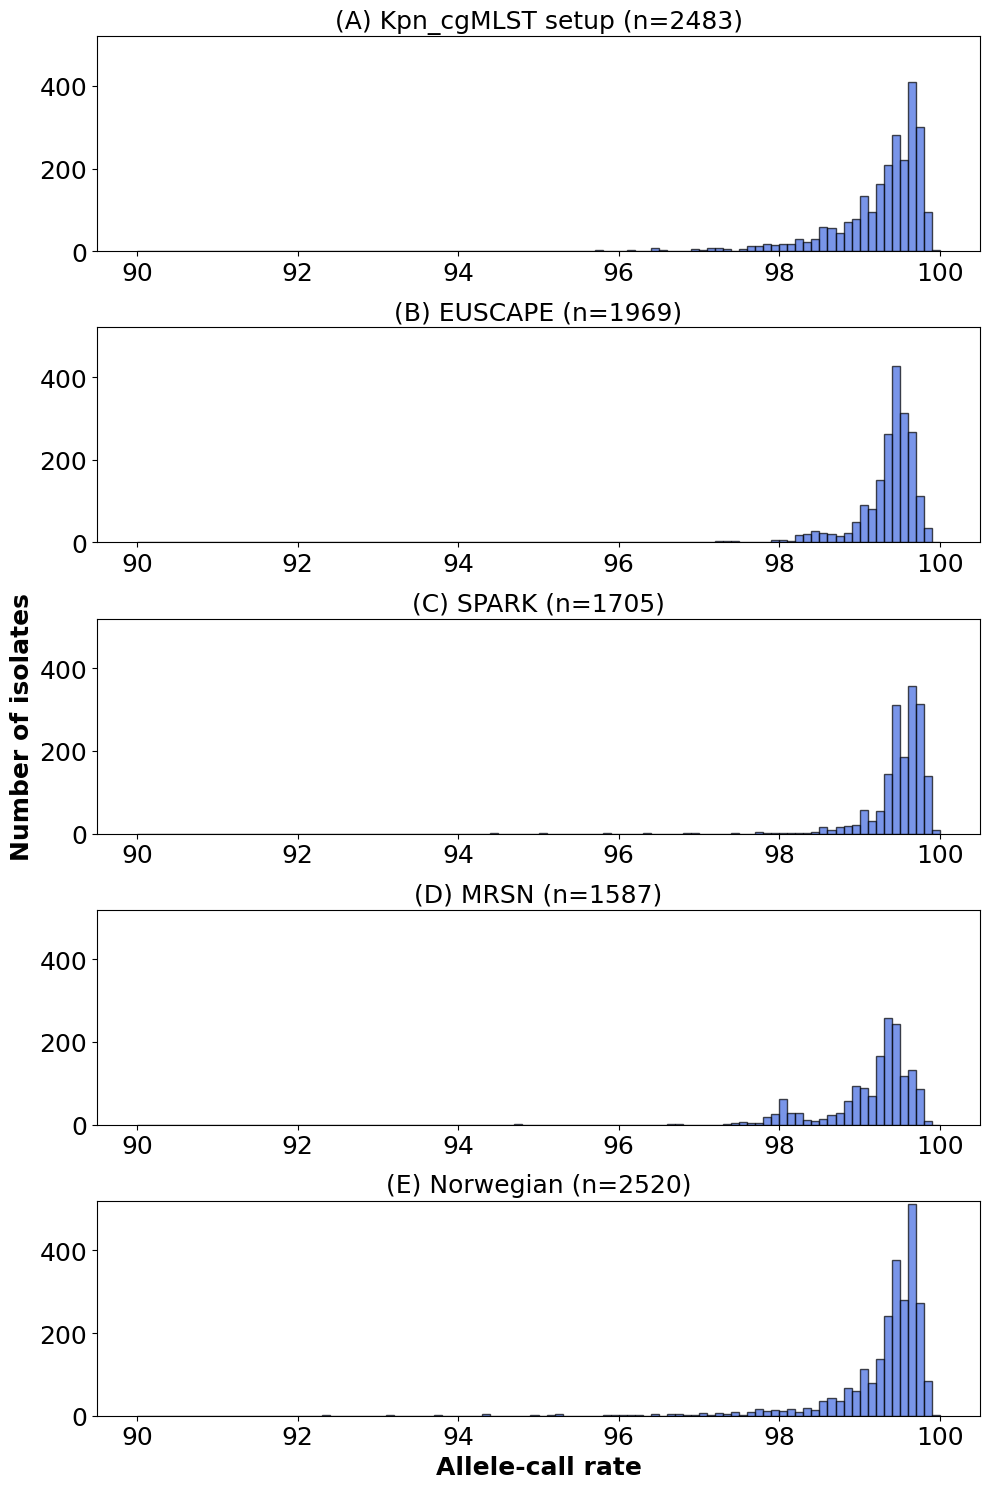

In [89]:
##### setup isolates
# Calculate percent present per isolate
setup_percent_present_per_isolate = 100 - (project172_kpn_2752.isna().sum(axis=1) / 2759) * 100

##### EuSCAPE
# Calculate percent present per isolate
EuSCAPE_percent_present_per_isolate = 100 - (EUSCAPE_KpnMLST.isna().sum(axis=1) / 2759) * 100

##### MRSN
# Calculate percent present per isolate
MRSN_percent_present_per_isolate = 100 - (MRSN_KpnMLST.isna().sum(axis=1) / 2759) * 100

##### spark
# Calculate percent present per isolate
spark_percent_present_per_isolate = 100 - (spark_KpnMLST.isna().sum(axis=1) / 2759) * 100

##### Norwegian
Norwegian_percent_present_per_isolate = 100 - (Norwegian_KpnMLST.isna().sum(axis=1) / 2759) * 100


# Define number of bins and range
bins = 100
range_ = (90, 100)

fig = plt.figure(figsize=(10, 15))
gs = fig.add_gridspec(5, 1)

# Define common y-axis limits
ylim = (0, 520)

# Kpn_MLST setup
ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(setup_percent_present_per_isolate, bins=bins, range=range_, alpha=0.7, color='royalblue', edgecolor='black')
ax1.set_ylim(ylim)
ax1.set_title('(A) Kpn_cgMLST setup (n=2483)', fontsize=18)
ax1.set_xlabel('')  # Remove x-axis label
ax1.set_ylabel('')  # Remove y-axis label
ax1.tick_params(axis='both', which='major', labelsize=18)  # Set tick font size

# EUSCAPE
ax2 = fig.add_subplot(gs[1, 0])
ax2.hist(EuSCAPE_percent_present_per_isolate, bins=bins, range=range_, alpha=0.7, color='royalblue', edgecolor='black')
ax2.set_ylim(ylim)
ax2.set_title('(B) EUSCAPE (n=1969)', fontsize=18)
ax2.set_xlabel('')  # Remove x-axis label
ax2.set_ylabel('')  # Remove y-axis label
ax2.tick_params(axis='both', which='major', labelsize=18)  # Set tick font size

# spark
ax3 = fig.add_subplot(gs[2, 0])
ax3.hist(spark_percent_present_per_isolate, bins=bins, range=range_, alpha=0.7, color='royalblue', edgecolor='black')
ax3.set_ylim(ylim)
ax3.set_title('(C) SPARK (n=1705)', fontsize=18)
ax3.set_xlabel('')  # Remove x-axis label
ax3.set_ylabel('Number of isolates', fontsize=18, fontweight='bold')
ax3.tick_params(axis='both', which='major', labelsize=18)  # Set tick font size

# MRSN
ax4 = fig.add_subplot(gs[3, 0])
ax4.hist(MRSN_percent_present_per_isolate, bins=bins, range=range_, alpha=0.7, color='royalblue', edgecolor='black')
ax4.set_ylim(ylim)
ax4.set_title('(D) MRSN (n=1587)', fontsize=18)
ax4.set_xlabel('')  # Remove x-axis label
ax4.set_ylabel('')  # Remove y-axis label
ax4.tick_params(axis='both', which='major', labelsize=18)  # Set tick font size

# Norwegian 
ax5 = fig.add_subplot(gs[4, 0])
ax5.hist(Norwegian_percent_present_per_isolate, bins=bins, range=range_, alpha=0.7, color='royalblue', edgecolor='black')
ax5.set_ylim(ylim)
ax5.set_title('(E) Norwegian (n=2520)', fontsize=18)
ax5.set_xlabel('Allele-call rate', fontsize=18, fontweight='bold')
ax5.set_ylabel('')  # Remove y-axis label
ax5.tick_params(axis='both', which='major', labelsize=18)  # Set tick font size


# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/plots/Allele_call_rate_combined_2752.png")

# Show the plot
plt.show()

# Checking the distances with or without the new schemes 

In [13]:
##### setup isolates (LIN4 isolates)
setup=pd.read_excel("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/setup_all.xlsx")

# Set the first column as the index
setup_df = setup.set_index(setup.columns[0])

# Drop the first two columns (original column 1 and 2)
setup_df = setup_df.iloc[:, 1:]
# # Drop the last two columns 
# setup_df = setup_df.iloc[:, :-2]

# Remove MLST loci 
setup_with = setup_df.drop(setup_df.columns[3381:3388], axis=1)
dropped_columns_with = setup_df.columns[3381:3388].tolist()

# Remove kpn cgMLST loci
setup_without = setup_df.drop(setup_df.columns[0:2752], axis=1)
dropped_columns_without = setup_df.columns[0:2752].tolist()

print(setup_with.shape)
print(setup_with.head(1))

print(setup_without.shape)
print(setup_without.head(1))

(2483, 3434)
    Kpn0001  Kpn0002  Kpn0003  Kpn0004  Kpn0005  Kpn0006  Kpn0007  Kpn0008  \
id                                                                           
6       1.0      1.0      2.0      2.0      2.0      2.0      2.0      2.0   

    Kpn0009  Kpn0010  ...  rpmA  rpmB  rpmC  rpmD  rpmE  rpmF  rpmG  rpmH  \
id                    ...                                                   
6       2.0      2.0  ...  59.0  43.0  33.0    28    44  41.0  44.0  32.0   

    rpmI  rpmJ  
id              
6   43.0    10  

[1 rows x 3434 columns]
(2483, 689)
    rbsC_S  rbsB_S  rbsK_S  yieP_S  polA_S  engB_S  KP1_0026_S  hemN_S  \
id                                                                       
6      1.0     1.0     1.0     1.0     1.0     1.0           1     1.0   

    glnG_S  glnL_S  ...  rpmA  rpmB  rpmC  rpmD  rpmE  rpmF  rpmG  rpmH  rpmI  \
id                  ...                                                         
6      1.0     1.0  ...  59.0  43.0  33.0    28

In [14]:
########################################## make the pairwise allelic distance matrices
####################### setup

############## with Kpn
# Ensure all data is numeric
alleles_without_numeric = setup_without.apply(pd.to_numeric, errors='coerce').fillna(0).values

# Initialize a matrix to store pairwise distances
num_isolates = alleles_without_numeric.shape[0]
distance_matrix_without = np.zeros((num_isolates, num_isolates), dtype=int)

# Calculate pairwise allelic distances
for i in range(num_isolates):
    for j in range(i + 1, num_isolates):
        # Count mismatches between isolate i and j
        mismatches = np.sum(alleles_without_numeric[i] != alleles_without_numeric[j])
        distance_matrix_without[i, j] = mismatches
        distance_matrix_without[j, i] = mismatches  # Ensure symmetry

# Convert the distance matrix to a DataFrame for easy viewing
DM_setup_without_df = pd.DataFrame(distance_matrix_without, index=setup_without.index, columns=setup_without.index)


############## without Kp
# Ensure all data is numeric
alleles_with_numeric = setup_with.apply(pd.to_numeric, errors='coerce').fillna(0).values

# Initialize a matrix to store pairwise distances
num_isolates = alleles_with_numeric.shape[0]
distance_matrix_with = np.zeros((num_isolates, num_isolates), dtype=int)

# Calculate pairwise allelic distances
for i in range(num_isolates):
    for j in range(i + 1, num_isolates):
        # Count mismatches between isolate i and j
        mismatches = np.sum(alleles_with_numeric[i] != alleles_with_numeric[j])
        distance_matrix_with[i, j] = mismatches
        distance_matrix_with[j, i] = mismatches  # Ensure symmetry

# Convert the distance matrix to a DataFrame for easy viewing
DM_setup_with_df = pd.DataFrame(distance_matrix_with, index=setup_with.index, columns=setup_with.index)

In [15]:
def pairwise_allelic_distance(df):
    # Ensure all data is numeric and fill missing as 0
    alleles_numeric = df.apply(pd.to_numeric, errors='coerce').fillna(0).values
    num_isolates = alleles_numeric.shape[0]
    distance_matrix = np.zeros((num_isolates, num_isolates), dtype=int)
    
    for i in range(num_isolates):
        for j in range(i + 1, num_isolates):
            # Compare only valid (nonzero) alleles in both isolates
            valid = (alleles_numeric[i] != 0) & (alleles_numeric[j] != 0)
            mismatches = np.sum((alleles_numeric[i] != alleles_numeric[j]) & valid)
            distance_matrix[i, j] = mismatches
            distance_matrix[j, i] = mismatches  # Symmetry
    # Return as a DataFrame with original isolate names/indices
    return pd.DataFrame(distance_matrix, index=df.index, columns=df.index)

DM_setup_without_df = pairwise_allelic_distance(setup_without)
DM_setup_with_df = pairwise_allelic_distance(setup_with)

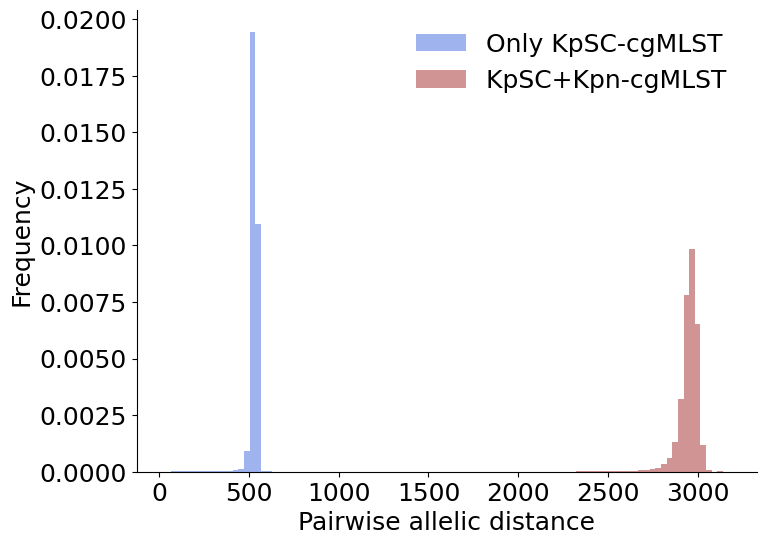

In [16]:
# Convert to NumPy array
distance_matrix_without = DM_setup_without_df.to_numpy()
distance_matrix_with = DM_setup_with_df.to_numpy()

# Flatten the matrices, excluding the diagonal
def flatten_matrix(matrix):
    return matrix[np.triu_indices_from(matrix, k=1)]

distances1 = flatten_matrix(distance_matrix_without)
distances2 = flatten_matrix(distance_matrix_with)

# Plot histograms of the filtered distances
plt.figure(figsize=(8, 6))

# Use density=True to normalize the histogram to represent frequency
#common range is used so the bin size is the same in both distributions
common_range = (min(distances1.min(), distances2.min()), max(distances1.max(), distances2.max()))
plt.hist(distances1, bins=100, alpha=0.5, label='Only KpSC-cgMLST', color='royalblue', density=True, range=common_range)
plt.hist(distances2, bins=100, alpha=0.5, label='KpSC+Kpn-cgMLST ', color='brown', density=True, range=common_range)
plt.legend(loc='upper right', frameon=False, fontsize=18)
# Add labels and legend
plt.xlabel('Pairwise allelic distance', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

plt.tick_params(axis='both', which='major', labelsize=18)


# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Create legend without borders



plt.savefig("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/plots/histogram_setup_pairwise_distances_KpSC_Kpn.png", dpi=600, bbox_inches='tight')

# Show plot
plt.show()

In [17]:
print(np.mean(distances1))
print(np.std(distances1))
print(np.mean(distances2))
print(np.std(distances2))

525.6478191914528
29.995876694932235
2937.67969265948
151.58183252821732


# EuSCAPE

In [18]:
##### EuSCAPE isolates 
EUSCAPE=pd.read_excel("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/EUSCAPE_all.xlsx")

# Set the first column as the index
EUSCAPE_df = EUSCAPE.set_index(EUSCAPE.columns[0])

# Drop the first two columns (original column 1 and 2)
EUSCAPE_df = EUSCAPE_df.iloc[:, 1:]
# # Drop the last two columns 
# EUSCAPE_df = EUSCAPE_df.iloc[:, :-2]

# Remove MLST loci 
EUSCAPE_with = EUSCAPE_df.drop(EUSCAPE_df.columns[3381:3388], axis=1)
dropped_columns_with = EUSCAPE_df.columns[3381:3388].tolist()

# Remove kpn cgMLST loci
EUSCAPE_without = EUSCAPE_df.drop(EUSCAPE_df.columns[0:2752], axis=1)
dropped_columns_without = EUSCAPE_df.columns[0:2752].tolist()

print(EUSCAPE_with.shape)
print(EUSCAPE_with.head(1))

print(EUSCAPE_without.shape)
print(EUSCAPE_without.head(1))

(1969, 3434)
       Kpn0001  Kpn0002  Kpn0003  Kpn0004  Kpn0005  Kpn0006  Kpn0007  Kpn0008  \
id                                                                              
15053      4.0        1      1.0      4.0      9.0       11       10      9.0   

       Kpn0009  Kpn0010  ...  rpmA  rpmB  rpmC  rpmD      rpmE  rpmF  rpmG  \
id                       ...                                                 
15053      8.0      7.0  ...    59    43    33    28  44;11556    41  1515   

       rpmH  rpmI     rpmJ  
id                          
15053    32    43  10;5343  

[1 rows x 3434 columns]
(1969, 689)
       rbsC_S  rbsB_S  rbsK_S  yieP_S  polA_S  engB_S  KP1_0026_S  hemN_S  \
id                                                                          
15053    22.0      21      30       8      32       6         9.0    10.0   

       glnG_S  glnL_S  ...  rpmA  rpmB  rpmC  rpmD      rpmE  rpmF  rpmG  \
id                     ...                                                 


# SPARK

In [19]:
##### spark isolates 
spark=pd.read_excel("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/SPARK_all.xlsx")

# Set the first column as the index
spark_df = spark.set_index(spark.columns[0])

# Drop the first two columns (original column 1 and 2)
spark_df = spark_df.iloc[:, 1:]
# # Drop the last two columns 
# spark_df = spark_df.iloc[:, :-2]

# Remove MLST loci 
spark_with = spark_df.drop(spark_df.columns[3381:3388], axis=1)
dropped_columns_with = spark_df.columns[3381:3388].tolist()

# Remove kpn cgMLST loci
spark_without = spark_df.drop(spark_df.columns[0:2752], axis=1)
dropped_columns_without = spark_df.columns[0:2752].tolist()

print(spark_with.shape)
print(spark_with.head(1))

print(spark_without.shape)
print(spark_without.head(1))

(1705, 3434)
       Kpn0001  Kpn0002  Kpn0003  Kpn0004  Kpn0005  Kpn0006  Kpn0007  Kpn0008  \
id                                                                              
12776        1        1     34.0       76     83.0       83     66.0      9.0   

       Kpn0009  Kpn0010  ...  rpmA  rpmB  rpmC  rpmD      rpmE  rpmF  rpmG  \
id                       ...                                                 
12776     51.0      1.0  ...    59  43.0  33.0    28  44;11556    41  1515   

       rpmH  rpmI     rpmJ  
id                          
12776    32  43.0  10;5343  

[1 rows x 3434 columns]
(1705, 689)
       rbsC_S  rbsB_S  rbsK_S  yieP_S  polA_S  engB_S  KP1_0026_S  hemN_S  \
id                                                                          
12776     1.0    30.0    57.0       8      80     8.0           8      31   

       glnG_S  glnL_S  ...  rpmA  rpmB  rpmC  rpmD      rpmE  rpmF  rpmG  \
id                     ...                                                 


# Norwegian

In [20]:
#### Norwegian isolates 
Norwegian=pd.read_excel("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/Norwegian_isolates_all.xlsx")

# Set the first column as the index
Norwegian_df = Norwegian.set_index(Norwegian.columns[0])

# Drop the first two columns (original column 1 and 2)
Norwegian_df = Norwegian_df.iloc[:, 1:]
# # Drop the last two columns 
# Norwegian_df = Norwegian_df.iloc[:, :-2]

# Remove MLST loci 
Norwegian_with = Norwegian_df.drop(Norwegian_df.columns[3381:3388], axis=1)
dropped_columns_with = Norwegian_df.columns[3381:3388].tolist()

# Remove kpn cgMLST loci
Norwegian_without = Norwegian_df.drop(Norwegian_df.columns[0:2752], axis=1)
dropped_columns_without = Norwegian_df.columns[0:2752].tolist()

print(Norwegian_with.shape)
print(Norwegian_with.head(1))

print(Norwegian_without.shape)
print(Norwegian_without.head(1))

(2520, 3434)
      Kpn0001  Kpn0002  Kpn0003  Kpn0004  Kpn0005  Kpn0006  Kpn0007  Kpn0008  \
id                                                                             
8872      1.0        1      6.0     10.0    142.0       10     48.0      1.0   

      Kpn0009  Kpn0010  ...  rpmA  rpmB  rpmC  rpmD      rpmE  rpmF  rpmG  \
id                      ...                                                 
8872     18.0      1.0  ...  59.0  43.0  33.0  28.0  44;16487  41.0  44.0   

      rpmH  rpmI      rpmJ  
id                          
8872  32.0  43.0  10;11646  

[1 rows x 3434 columns]
(2520, 689)
      rbsC_S  rbsB_S  rbsK_S  yieP_S  polA_S  engB_S  KP1_0026_S  hemN_S  \
id                                                                         
8872   582.0    10.0      56    31.0   128.0     8.0         9.0    29.0   

      glnG_S  glnL_S  ...  rpmA  rpmB  rpmC  rpmD      rpmE  rpmF  rpmG  rpmH  \
id                    ...                                                       

# MRSN

In [21]:
#### MRSN isolates 
MRSN=pd.read_excel("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/MRSN_all.xlsx")

# Set the first column as the index
MRSN_df = MRSN.set_index(MRSN.columns[0])

# Drop the first two columns (original column 1 and 2)
MRSN_df = MRSN_df.iloc[:, 1:]
# # Drop the last two columns 
# MRSN_df = MRSN_df.iloc[:, :-2]

# Remove MLST loci 
MRSN_with = MRSN_df.drop(MRSN_df.columns[3381:3388], axis=1)
dropped_columns_with = MRSN_df.columns[3381:3388].tolist()

# Remove kpn cgMLST loci
MRSN_without = MRSN_df.drop(MRSN_df.columns[0:2752], axis=1)
dropped_columns_without = MRSN_df.columns[0:2752].tolist()

print(MRSN_with.shape)
print(MRSN_with.head(1))

print(MRSN_without.shape)
print(MRSN_without.head(1))

(1587, 3434)
       Kpn0001  Kpn0002  Kpn0003  Kpn0004  Kpn0005  Kpn0006  Kpn0007  Kpn0008  \
id                                                                              
58251        5        1      4.0      1.0     11.0     12.0     11.0      1.0   

       Kpn0009  Kpn0010  ...  rpmA  rpmB  rpmC  rpmD  rpmE  rpmF  rpmG  rpmH  \
id                       ...                                                   
58251      9.0      1.0  ...    59    43  33.0    28    44    41  1515    32   

       rpmI  rpmJ  
id                 
58251    43    10  

[1 rows x 3434 columns]
(1587, 689)
       rbsC_S  rbsB_S  rbsK_S  yieP_S  polA_S  engB_S  KP1_0026_S  hemN_S  \
id                                                                          
58251     9.0    10.0      25       1    10.0     8.0         9.0    10.0   

       glnG_S  glnL_S  ...  rpmA  rpmB  rpmC  rpmD  rpmE  rpmF  rpmG  rpmH  \
id                     ...                                                   
58251    10.0    

### Concatenate all the validation dataset results

In [22]:
# Merge the DataFrames by adding rows together
validation_with = pd.concat([EUSCAPE_with, spark_with, Norwegian_with, MRSN_with])
validation_without = pd.concat([EUSCAPE_without, spark_without, Norwegian_without, MRSN_without])

In [23]:
# make an efficient calculation of pairwise distances
from scipy.spatial.distance import pdist, squareform

# # Function to calculate pairwise distances and return as DataFrame
# def calculate_pairwise_distances(df):
#     # Ensure all data is numeric
#     numeric_data = df.apply(pd.to_numeric, errors='coerce').fillna(0).values
#     # Calculate pairwise distances
#     pairwise_distances = pdist(numeric_data, metric='hamming') * numeric_data.shape[1]
#     # Convert to a square-form distance matrix
#     distance_matrix = squareform(pairwise_distances)
#     # Return as a DataFrame
#     return pd.DataFrame(distance_matrix, index=df.index, columns=df.index)

def fast_pairwise_hamming_skipna(df):
    arr = df.apply(pd.to_numeric, errors='coerce').values
    n = len(arr)
    dist_mat = np.zeros((n, n), dtype=float)
    for i in range(n):
        xi = arr[i, :]
        mask = ~np.isnan(xi) & ~np.isnan(arr)
        diff = (xi != arr) & mask
        num_diff = diff.sum(axis=1).astype(float)  # Ensure float type!
        num_compared = mask.sum(axis=1)
        num_diff[num_compared == 0] = np.nan
        dist_mat[i, :] = num_diff
    return pd.DataFrame(dist_mat, index=df.index, columns=df.index)


In [24]:
# Calculate distances for validation without
DM_validation_without_df = fast_pairwise_hamming_skipna(validation_without)
# Calculate distances for validation with
DM_validation_with_df = fast_pairwise_hamming_skipna(validation_with)

In [28]:
# Save the distance matrix without additional data to a TSV file
DM_validation_without_df.to_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/DM_validation_without.tsv', sep='\t', index=True)
# Save the distance matrix with additional data to a TSV file
DM_validation_with_df.to_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/DM_validation_with.tsv', sep='\t', index=True)

In [50]:
# open
DM_validation_with_df=pd.read_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/DM_validation_with.tsv', sep='\t', index_col=0)
DM_validation_without_df=pd.read_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/DM_validation_without.tsv', sep='\t', index_col=0)
print(DM_validation_with_df.shape)
print(DM_validation_with_df.head(1))

(7781, 7781)
       15053  15054  15055  15056  15057   15058  15059   15060   15061  \
id                                                                        
15053    0.0   39.0    1.0   49.0   42.0  2948.0   26.0  3010.0  2992.0   

        15062  ...   78137   78138   78139   78140   78141   78142   78143  \
id             ...                                                           
15053  2951.0  ...  2872.0  2936.0  2883.0  2989.0  2919.0  2992.0  2967.0   

        78144   78145   78146  
id                             
15053  2902.0  2972.0  2903.0  

[1 rows x 7781 columns]


In [51]:
EUSCAPE_cgST=pd.read_excel("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/EUSCAPE_meta.xlsx")
#EUSCAPE_cgST
spark_cgST=pd.read_excel("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/SPARK_meta.xlsx")
#spark_cgST
Norwegian_cgST=pd.read_excel("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/Norwegian_isolates_meta.xlsx")
#Norwegian_cgST
MRSN_cgST=pd.read_excel("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/MRSN_meta.xlsx")
#MRSN_cgST
validation_cgST= pd.concat([EUSCAPE_cgST, spark_cgST, Norwegian_cgST, MRSN_cgST])
print(validation_cgST.shape)
print(validation_cgST.head(1))

(7782, 9)
      id        isolate scgST (scgMLST629_S)  LINcode (scgMLST629_S)  \
0  15053  EuSCAPE_AT002            1388;8320  0_0_105_0_9_0_0_10_0_0   

  Phylogroup (scgMLST629_S) Sublineage (scgMLST629_S)  \
0                       Kp1                     SL258   

  Clonal group (scgMLST629_S)  private_record private_owner  
0                       CG340           False           NaN  


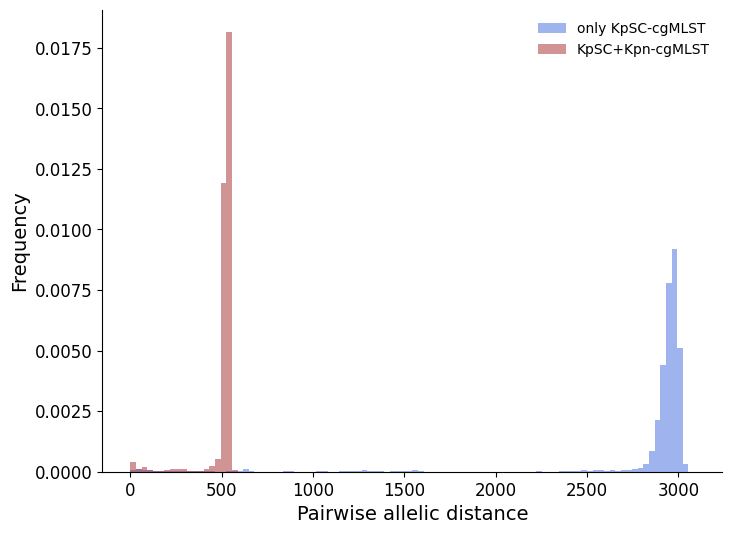

In [52]:
# Convert to NumPy array
distance_matrix_without = DM_validation_without_df.to_numpy()
distance_matrix_with = DM_validation_with_df.to_numpy()

# Flatten the matrices, excluding the diagonal
def flatten_matrix(matrix):
    return matrix[np.triu_indices_from(matrix, k=1)]

distances1 = flatten_matrix(distance_matrix_without)
distances2 = flatten_matrix(distance_matrix_with)

# Plot histograms of the filtered distances
plt.figure(figsize=(8, 6))

# Use density=True to normalize the histogram to represent frequency
#common range is used so the bin size is the same in both distributions
common_range = (min(distances1.min(), distances2.min()), max(distances1.max(), distances2.max()))
plt.hist(distances2, bins=100, alpha=0.5, label='only KpSC-cgMLST', color='royalblue', density=True, range=common_range)
plt.hist(distances1, bins=100, alpha=0.5, label='KpSC+Kpn-cgMLST', color='brown', density=True, range=common_range)


# Add labels and legend
plt.xlabel('Pairwise allelic distance', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adjust tick parameters for size 12
plt.tick_params(axis='both', which='major', labelsize=12)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Create legend without borders
plt.legend(loc='upper right', frameon=False)

plt.savefig("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/plots/histogram_validation_pairwise_distances_KpSC_Kpn.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()

In [53]:
print(np.mean(distances1))
print(np.std(distances1))
print(np.mean(distances2))
print(np.std(distances2))

509.2331031459203
83.55597792449664
2856.234464843999
454.02912660510833


In [54]:
######### without Kpn

# Ensure DM_validation_with_df is a NumPy array; no need for conditional check
distances = DM_validation_without_df.to_numpy()

# Extract isolate IDs once
ids = DM_validation_without_df.index.to_numpy()

# Efficiently extract only required indices of the upper triangle 
i_upper = np.triu_indices_from(distances, k=1)

# Extract distances and ids in one step to avoid intermediate arrays
distances_flat = distances[i_upper]
isolate1_ids, isolate2_ids = ids[i_upper[0]], ids[i_upper[1]]

# Create and merge DataFrame efficiently using method chaining
merged_validation_without = (
    pd.DataFrame({
        'isolate1_id': isolate1_ids,
        'isolate2_id': isolate2_ids,
        'distance': distances_flat
    })
    .merge(validation_cgST[['id', 'Clonal group (scgMLST629_S)']], left_on='isolate1_id', right_on='id')
    .rename(columns={'Clonal group (scgMLST629_S)': 'cg1'})
    .drop('id', axis=1)
    .merge(validation_cgST[['id', 'Clonal group (scgMLST629_S)']], left_on='isolate2_id', right_on='id')
    .rename(columns={'Clonal group (scgMLST629_S)': 'cg2'})
    .drop('id', axis=1)
)

# Optionally sort once using indices as keys read directly without hardcoding names
merged_validation_without.sort_values(by=['isolate1_id', 'isolate2_id'], inplace=True)

# Reset index for final output
merged_validation_without.reset_index(drop=True, inplace=True)

print(merged_validation_without)

          isolate1_id  isolate2_id  distance      cg1      cg2
0                8872         8873     541.0  CG11894  CG14258
1                8872         8874     539.0  CG11894  CG14415
2                8872         8879     534.0  CG11894  CG14416
3                8872         8881     533.0  CG11894  CG11897
4                8872         8882     531.0  CG11894   CG1035
...               ...          ...       ...      ...      ...
30268085        78143        78145     519.0     CG17    CG101
30268086        78143        78146     531.0     CG17     CG38
30268087        78144        78145     535.0     CG38    CG101
30268088        78144        78146       0.0     CG38     CG38
30268089        78145        78146     535.0    CG101     CG38

[30268090 rows x 5 columns]


In [55]:
#################### with Kpn 

# Ensure DM_validation_with_df is a NumPy array; no need for conditional check
distances = DM_validation_with_df.to_numpy()

# Extract isolate IDs once
ids = DM_validation_with_df.index.to_numpy()

# Efficiently extract only required indices of the upper triangle 
i_upper = np.triu_indices_from(distances, k=1)

# Extract distances and ids in one step to avoid intermediate arrays
distances_flat = distances[i_upper]
isolate1_ids, isolate2_ids = ids[i_upper[0]], ids[i_upper[1]]

# Create and merge DataFrame 
merged_validation_with = (
    pd.DataFrame({
        'isolate1_id': isolate1_ids,
        'isolate2_id': isolate2_ids,
        'distance': distances_flat
    })
    .merge(validation_cgST[['id', 'Clonal group (scgMLST629_S)']], left_on='isolate1_id', right_on='id')
    .rename(columns={'Clonal group (scgMLST629_S)': 'cg1'})
    .drop('id', axis=1)
    .merge(validation_cgST[['id', 'Clonal group (scgMLST629_S)']], left_on='isolate2_id', right_on='id')
    .rename(columns={'Clonal group (scgMLST629_S)': 'cg2'})
    .drop('id', axis=1)
)

# Optionally sort once using indices as keys read directly without hardcoding names
merged_validation_with.sort_values(by=['isolate1_id', 'isolate2_id'], inplace=True)

# Reset index for final output
merged_validation_with.reset_index(drop=True, inplace=True)

print(merged_validation_with)

          isolate1_id  isolate2_id  distance      cg1      cg2
0                8872         8873    2983.0  CG11894  CG14258
1                8872         8874    2975.0  CG11894  CG14415
2                8872         8879    2981.0  CG11894  CG14416
3                8872         8881    2968.0  CG11894  CG11897
4                8872         8882    2943.0  CG11894   CG1035
...               ...          ...       ...      ...      ...
30268085        78143        78145    2979.0     CG17    CG101
30268086        78143        78146    2945.0     CG17     CG38
30268087        78144        78145    2991.0     CG38    CG101
30268088        78144        78146       1.0     CG38     CG38
30268089        78145        78146    2991.0    CG101     CG38

[30268090 rows x 5 columns]


In [56]:
# Save the distance matrix without additional data to a TSV file
merged_validation_with.to_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/merged_validation_with.tsv', sep='\t', index=False)
merged_validation_without.to_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/merged_validation_without.tsv', sep='\t', index=False)

In [57]:
# open
merged_validation_with=pd.read_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/merged_validation_with.tsv', sep='\t')
merged_validation_without=pd.read_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/merged_validation_without.tsv', sep='\t')

In [58]:
# Prepare clonal group data
clonal_group_order = validation_cgST.set_index('id')
# Convert indices of clonal_group_order to integer (if all are numeric)
clonal_group_order.index = clonal_group_order.index.astype(int)
same_clade_df = merged_validation_with[merged_validation_with['cg1'] == merged_validation_with['cg2']].copy()
cg1_counts = validation_cgST.groupby('Clonal group (scgMLST629_S)').size()
valid_cg1s = cg1_counts[cg1_counts >= 50].index

/local/scratch/tmp/ipykernel_424923/1742427126.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


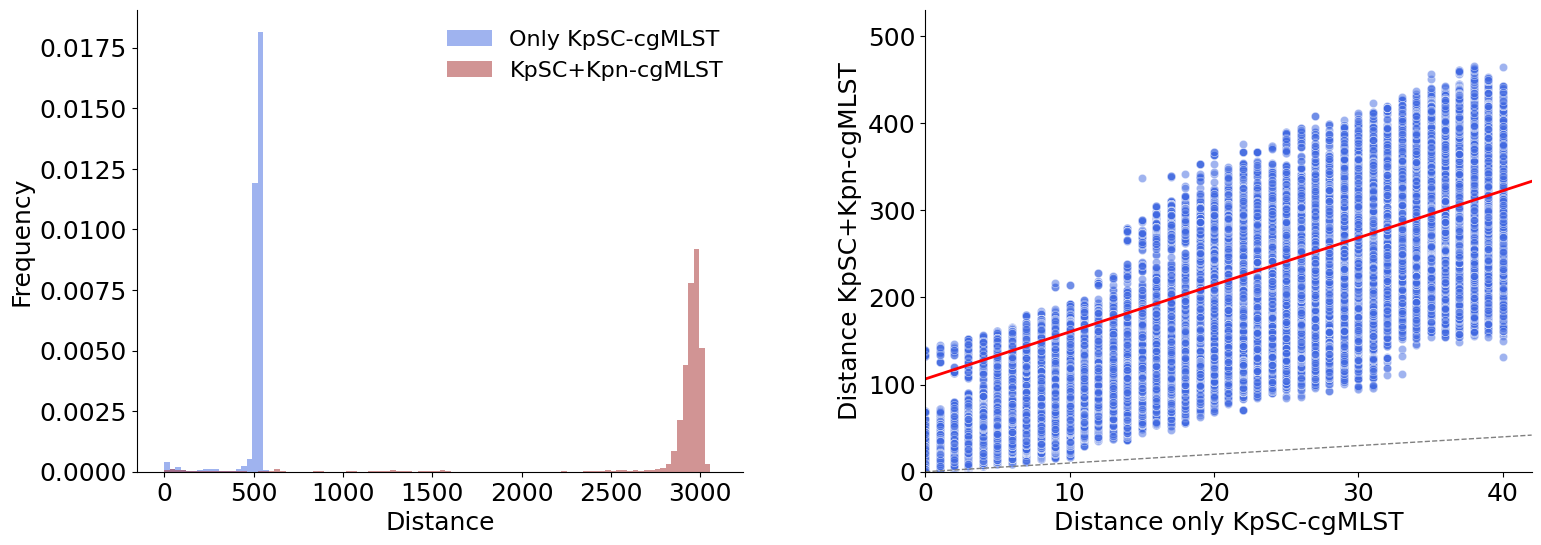

In [62]:
from scipy.stats import mannwhitneyu
from matplotlib.gridspec import GridSpec
from scipy.stats import linregress
import seaborn as sns

# Assume these DataFrames and data structures are pre-defined
# - DM_validation_with_df
# - DM_validation_without_df
# - merged_validation with and without
# - same_clade_df
# - valid_cg1s

# Convert to NumPy arrays for first plot
distance_matrix_without = DM_validation_without_df.to_numpy()
distance_matrix_with = DM_validation_with_df.to_numpy()

# Flatten the matrices for histograms
def flatten_matrix(matrix):
    return matrix[np.triu_indices_from(matrix, k=1)]

distances1 = flatten_matrix(distance_matrix_without)
distances2 = flatten_matrix(distance_matrix_with)

# Prepare combined figure with specified layout
fig = plt.figure(figsize=(18, 6))
gs = GridSpec(1, 2, width_ratios=[1, 1], wspace=0.3)

# First row, first subplot: Histograms
ax1 = fig.add_subplot(gs[0, 0])
common_range = (min(distances1.min(), distances2.min()), max(distances1.max(), distances2.max()))
ax1.hist(distances1, bins=100, alpha=0.5, label='Only KpSC-cgMLST', color='royalblue', density=True, range=common_range)
ax1.hist(distances2, bins=100, alpha=0.5, label='KpSC+Kpn-cgMLST', color='brown', density=True, range=common_range)
ax1.set_xlabel('Distance', fontsize=18)
ax1.set_ylabel('Frequency', fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# Create legend without borders
ax1.legend(loc='upper right', frameon=False, fontsize=16)


# 2nd plot, full-width subplot: Scatter plot
ax4 = fig.add_subplot(gs[0, 1])
threshold = 40
mask = distances1 <= threshold
filtered_distances1 = distances1[mask]
filtered_distances2 = distances2[mask]
ax4.scatter(
    filtered_distances1, 
    filtered_distances2, 
    alpha=0.5, 
    color='royalblue', 
    edgecolors='w', 
    linewidth=0.5
)


# Calculate linear regression
slope, intercept, _, _, _ = linregress(distances1,distances2)
# Plot the linear regression line
x_values = np.array([0, 42])
ax4.plot(
    x_values, 
    slope * x_values + intercept, 
    color='red', 
    linewidth=2, 
    label='_nolegend_'
)

ax4.set_xlabel('Distance only KpSC-cgMLST', fontsize=18)
ax4.set_ylabel('Distance KpSC+Kpn-cgMLST', fontsize=18)
ax4.set_ylim(0, 530)
ax4.set_xlim(0, 42)
ax4.tick_params(axis='both', which='major', labelsize=18)
sns.despine(ax=ax4, top=True, right=True)


# Set the limits for the line
x_min, x_max = ax4.get_xlim()
y_min, y_max = ax4.get_ylim()

# The line should pass through (0, 0) and have a slope of 1 (y = x)
ax4.plot(
    [x_min, x_max], 
    [x_min, x_max], 
    linestyle='--', 
    color='gray', 
    linewidth=1
)

plt.tight_layout()
plt.savefig("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/plots/combined_subplots_histogram_validation.png", dpi=600)
plt.show()

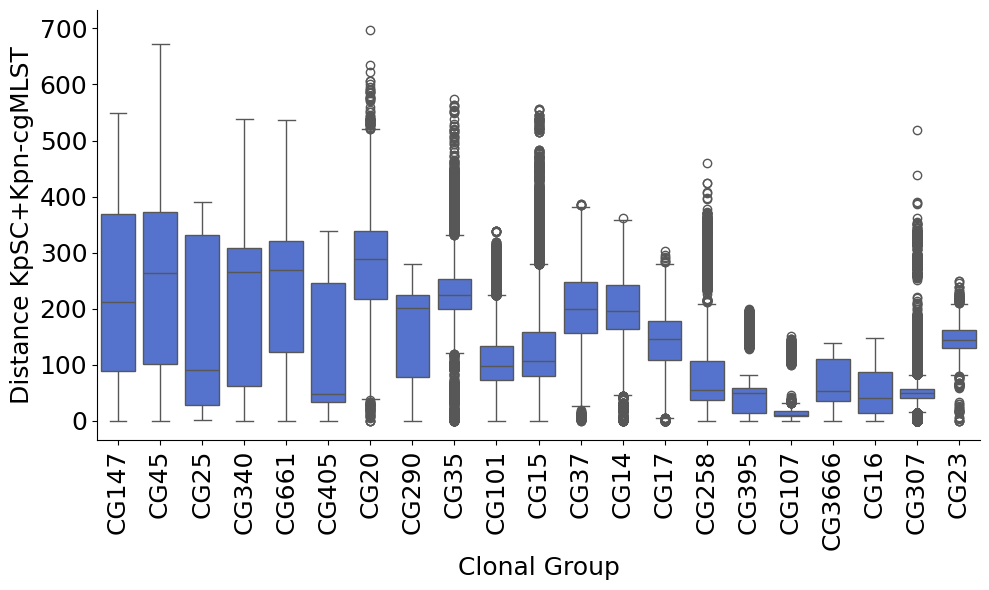

In [63]:
import seaborn as sns

# Filter data as before
filtered_data = same_clade_df[same_clade_df['cg1'].isin(valid_cg1s)]

# Sort cg1 by variance of 'distance'
variance_by_cg = filtered_data.groupby('cg1')['distance'].var().sort_values(ascending=False)
sorted_filtered_data = filtered_data[filtered_data['cg1'].isin(variance_by_cg.index)]

# Create single axes
plt.figure(figsize=(10,6))
sns.boxplot(
    data=sorted_filtered_data, 
    x='cg1', 
    y='distance', 
    order=variance_by_cg.index, 
    color='royalblue'
)

# Formatting
y_max = sorted_filtered_data['distance'].max()
offset = (y_max - sorted_filtered_data['distance'].min()) * 0.05
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Clonal Group', fontsize=18)
plt.ylabel('Distance KpSC+Kpn-cgMLST', fontsize=18)
sns.despine(top=True, right=True)

plt.tight_layout()
plt.savefig("./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/BIGSdb_tests/prod/plots/clonal_groups_distances_validation.png", dpi=600)
plt.show()